

# <span style="color:gold;">**Exploratory Data Analysis (EDA) Notebook**</span>

## **Introduction:**

This notebook presents an Exploratory Data Analysis (EDA), offering insights into the dataset by visualizing relationships, patterns, and data distribution. Each graph aims to help understand the underlying data and make informed decisions before applying machine learning models or other analytical methods.

We cover the entire Data Analysis in 3 parts

1. Univariate
2. Bivariate
3. Multivariate

During the entire EDA process, we will try to answer some important things to look for in the dataset.

## **IMPORTANT NOTE**:
The primary objective of Data Auditing and Behavioral Analysis is to identify the areas where the most risk originates. This analysis provides valuable insights for risk analysts or data scientists, enabling them to focus on the high-risk segments during the modeling process.

Before proceeding further, it's crucial to ensure that the Data Audit and Behavioral Analysis reports are aligned with **Portfolio Managers** and **Risk Analysts**. If any data quality issues arise, it's essential to involve **Business Analysts** and **Product Managers** to determine whether these discrepancies are intentional or the result of a system bug.

The credit scoring process is comprehensive, involving collaboration from almost all teams. The deployment of the model will have a significant impact on **sales** and **marketing** objectives. For example, **collections** targets may need to be adjusted once the Probability of Default (PD) model is integrated into impairment forecasting. Additionally, **Portfolio Manager**s and **Underwriters** might need to revise their risk Apetite. Throughout the model development process, the **engineering** and product teams should be on standby to address any data quality concerns that may arise.

In [210]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Imports
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
%run utils.ipynb

In [136]:
# Load and inspect data
df = pd.read_csv("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/data/Raw/credit.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df['IsDefault'] = df['default'].apply(lambda x: 'Good' if x == 0 else 'Bad')
display(df.head())
display(df.info())
display(df.describe())


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender,IsDefault
0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,none,...,none,own,2,0,1,2.349340e+09,yes,skilled employee,male,Good
1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,none,...,none,own,1,1,1,NaN,yes,skilled employee,female,Bad
2,NaN,12,critical,education,2096,24.0,5 years,2,single,none,...,none,own,1,0,2,NaN,yes,unskilled resident,male,Good
3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,guarantor,...,none,for free,1,0,2,NaN,yes,skilled employee,male,Good
4,-23.0,24,delayed,car (new),4870,43.0,3 years,3,single,none,...,none,for free,2,1,2,NaN,yes,skilled employee,male,Bad


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      606 non-null    float64
 1   months_loan_duration  1000 non-null   int64  
 2   credit_history        1000 non-null   object 
 3   purpose               1000 non-null   object 
 4   amount                1000 non-null   int64  
 5   savings_balance       817 non-null    float64
 6   employment_length     938 non-null    object 
 7   installment_rate      1000 non-null   int64  
 8   personal_status       690 non-null    object 
 9   other_debtors         1000 non-null   object 
 10  residence_history     870 non-null    object 
 11  property              1000 non-null   object 
 12  age                   1000 non-null   int64  
 13  installment_plan      1000 non-null   object 
 14  housing               1000 non-null   object 
 15  existing_credits      

None

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,age,existing_credits,default,dependents,telephone
count,606.000000,1000.000000,1000.000000,817.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,4.040000e+02
mean,97.245875,20.903000,3271.258000,781.570379,2.973000,35.546000,1.407000,0.300000,1.155000,2.344914e+09
std,206.923583,12.058814,2822.736876,3016.983785,1.118715,11.375469,0.577654,0.458487,0.362086,3.008193e+06
min,-50.000000,4.000000,250.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,2.340000e+09
25%,-23.000000,12.000000,1365.500000,31.000000,2.000000,27.000000,1.000000,0.000000,1.000000,2.342211e+09
50%,24.000000,18.000000,2319.500000,64.000000,3.000000,33.000000,1.000000,0.000000,1.000000,2.344804e+09
75%,131.750000,24.000000,3972.250000,128.000000,4.000000,42.000000,2.000000,1.000000,1.000000,2.347731e+09
max,999.000000,72.000000,18424.000000,19972.000000,4.000000,75.000000,4.000000,1.000000,2.000000,2.349994e+09


## <span style="color:darkgreen;">**Univariate Analysis**</span>

- Analyzing predictor variable one by one.

### **How is the proportion of the response variable?**

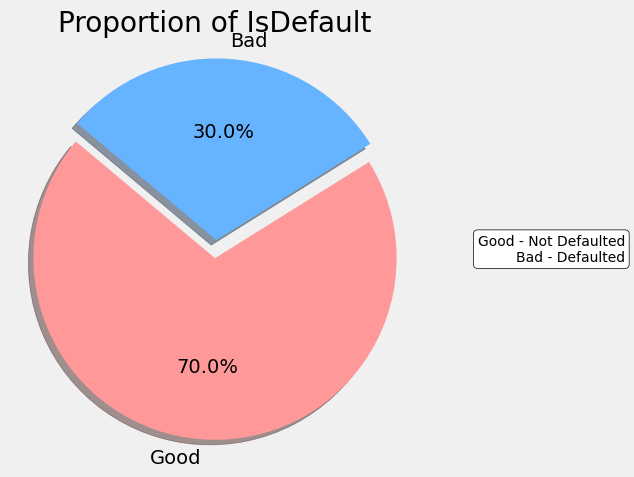

In [137]:
plt.style.use('fivethirtyeight')

# Count the values of "loan_status"
loan_status_counts = df["IsDefault"].value_counts()

# Create labels and sizes for the pie chart
labels = ["Good", "Bad"]
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Proportion of IsDefault")

# Add annotation
annotation = (
    "Good - Not Defaulted\n"
    "Bad - Defaulted"
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords="axes fraction", ha="right", va="center", fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.savefig("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/proportion_of_loan_status.png", bbox_inches = 'tight')
plt.show()

### Answer

The response variable is unbalanced, with Good Customers making up approximately **70%** and Bad Customers making up about **30%**. This imbalance is common in the credit industry, as most users are not expected to default.

### **Were there missing values inside the predictor variables?**



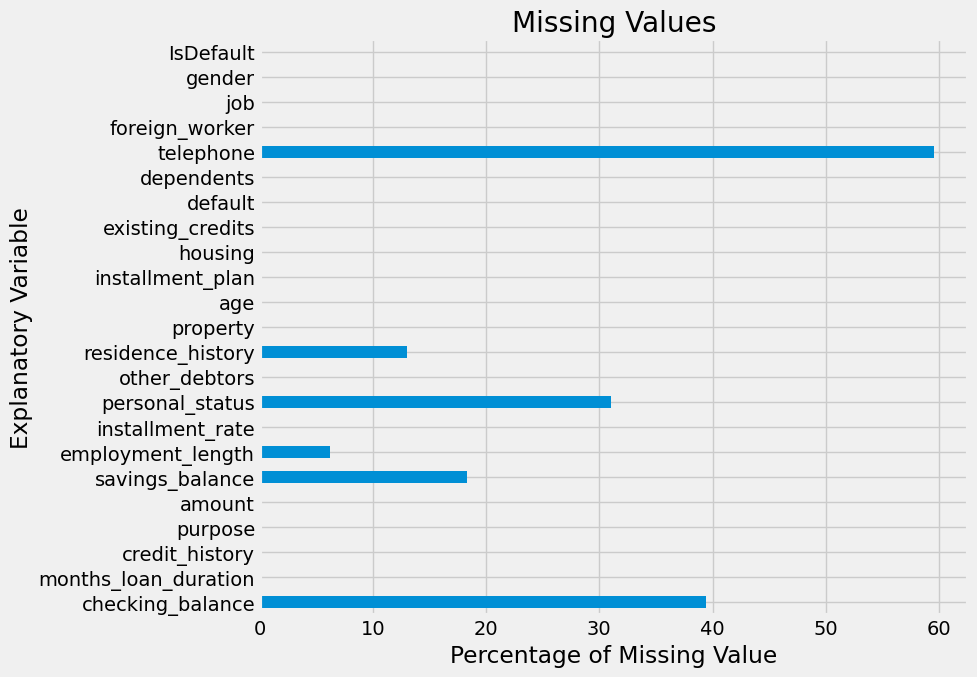

In [138]:
# Count percentage missing values
missing_values_count = df.isna().sum()
(missing_values_count / len(df) * 100).plot(kind="barh", figsize=(10, 7))
plt.title("Missing Values")
plt.xlabel("Percentage of Missing Value")
plt.ylabel("Explanatory Variable")
plt.tight_layout()
plt.savefig("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/missing_values.png", bbox_inches = 'tight')
plt.show()

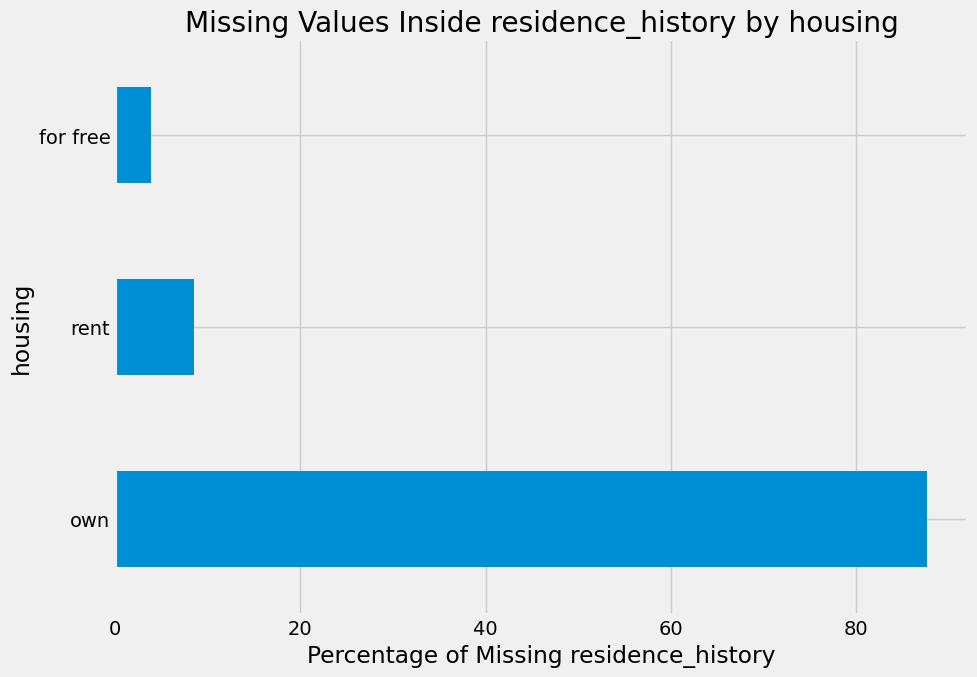

In [139]:
variable_1 = 'residence_history'
variable_2 = 'housing'

(df[df[variable_1].isna()][variable_2].value_counts(normalize=True)*100).plot(kind="barh", figsize=(10, 7))
plt.title(f"Missing Values Inside {variable_1} by {variable_2}")
plt.xlabel(f"Percentage of Missing {variable_1}")
plt.ylabel(f"{variable_2}")
plt.tight_layout()
plt.savefig(f"/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/missing_values_inside_{variable_1}_by_{variable_2}.png", bbox_inches = 'tight')
plt.show()

In [140]:
df[df['checking_balance'].isna()]


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender,IsDefault
2,NaN,12,critical,education,2096,24.0,5 years,2,single,none,...,none,own,1,0,2,NaN,yes,unskilled resident,male,Good
5,NaN,36,repaid,education,9055,NaN,2 years,2,single,none,...,none,for free,1,0,2,2.345788e+09,yes,unskilled resident,male,Good
6,NaN,24,repaid,furniture,2835,761.0,11 years,3,single,none,...,none,own,1,0,1,NaN,yes,skilled employee,male,Good
8,NaN,12,repaid,radio/tv,3059,18426.0,4 years,2,divorced,none,...,none,own,1,0,1,NaN,yes,unskilled resident,male,Good
16,NaN,24,critical,radio/tv,2424,NaN,17 years,4,single,none,...,none,own,2,0,1,NaN,yes,skilled employee,male,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,NaN,12,critical,education,3565,NaN,5 months,2,single,none,...,none,own,2,0,2,NaN,yes,unskilled resident,male,Good
991,NaN,15,fully repaid this bank,radio/tv,1569,455.0,9 years,4,single,none,...,bank,own,1,0,2,NaN,yes,unskilled resident,male,Good
994,NaN,12,repaid,car (new),2390,NaN,17 years,4,single,none,...,none,own,1,0,1,2.341832e+09,yes,skilled employee,male,Good
995,NaN,12,repaid,furniture,1736,48.0,4 years,3,NaN,none,...,none,own,1,0,1,NaN,yes,unskilled resident,female,Good


### **Answer**

There are missing values in the checking_balance, savings_balance, personal_status, residential_status, employment_length and telephone. 

1. Missing values in residential_status suggests that individuals who own their homes have a much higher rate of missing data in the residence_history field, while those who live in rented or “for free” housing have lower percentages of missing values. Reason could be because its not a mandatory field while filling up the form and customers who have their own home do not remember exactly since when they are living at their birth place. We will fill the NaNs with Unknown and will make seperate Bin of this variable

2. Missing values in checking_balance and savings_balance may result from human or system errors. Further investigation is needed to determine the cause. For this project, missing values are replaced with the mean or median, based on the data distribution. We will just insert 0.

3. Telephone is missing aronnd 60% which is quite suspeciois considering to apply for a loan phone number is mandatory. we will avoid using this variable, but telephone number is an important check in fraud events. 

4. Employment length is missing max at 6% we can impute median to it. 


### **How is the distribution for the numerical predictor variable? Are there any outliers or anomalies?**

In [141]:
# df['amount'] = np.log1p(df['amount'])  # log1p handles 0s properly (log(0) is undefined)
df['residence_history'].fillna("Unknown", inplace=True)
df['employment_length'].fillna("Unknown", inplace=True)

# Helper function to convert employment length to numeric years
def employment_length_to_years(s):
    if 'year' in s:
        return int(s.split()[0])
    elif 'month' in s:
        return int(s.split()[0]) / 12
    return np.nan

# Convert employment_length to numeric years, treating "Unknown" as NaN for now
df['employment_length_years'] = df['employment_length'].apply(lambda x: employment_length_to_years(x) if x != "Unknown" else np.nan)
df['employment_length_years'].fillna(df['employment_length_years'].median(), inplace=True)


# Convert residence_history to numeric years, treating "Unknown" as NaN for now
df['residence_history_years'] = df['residence_history'].apply(lambda x: employment_length_to_years(x) if x != "Unknown" else np.nan)
df['residence_history_years'].fillna(df['residence_history_years'].median(), inplace=True)

df.head()


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,existing_credits,default,dependents,telephone,foreign_worker,job,gender,IsDefault,employment_length_years,residence_history_years
0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,none,...,2,0,1,2.349340e+09,yes,skilled employee,male,Good,13.0,6.000000
1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,none,...,1,1,1,NaN,yes,skilled employee,female,Bad,2.0,0.416667
2,NaN,12,critical,education,2096,24.0,5 years,2,single,none,...,1,0,2,NaN,yes,unskilled resident,male,Good,5.0,4.000000
3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,guarantor,...,1,0,2,NaN,yes,skilled employee,male,Good,5.0,13.000000
4,-23.0,24,delayed,car (new),4870,43.0,3 years,3,single,none,...,2,1,2,NaN,yes,skilled employee,male,Bad,3.0,13.000000


In [142]:
def plot_hist_box(df: pd.DataFrame, numerical_predictor_variable: str,figsize: Tuple[int, int]) -> None:
    """
    Show distribution of numerical data by histogram plot and boxplot.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_predictor_variable (str): numerical columns to be plotted
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns

    # Histogram
    df[numerical_predictor_variable].hist(ax=ax[0], bins=30, edgecolor='black')
    mean_value = df[numerical_predictor_variable].mean()
    median_value = df[numerical_predictor_variable].median()
    ax[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax[0].axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    ax[0].set_title(f"Histogram of {numerical_predictor_variable}")
    ax[0].set_xlabel(numerical_predictor_variable)
    ax[0].set_ylabel("Frequency")
    ax[0].legend()

    # Boxplot
    df.boxplot(column=numerical_predictor_variable, ax=ax[1])
    ax[1].set_title(f"Boxplot of {numerical_predictor_variable}")
    ax[1].set_xlabel(numerical_predictor_variable)
    ax[1].set_ylabel("Value")

    # Show plots
    plt.tight_layout()
    plt.savefig(f"/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/histogram_boxplot_of_{numerical_predictor_variable}.png", bbox_inches = 'tight')
    plt.show()

In [143]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [144]:
numerical_features

['checking_balance',
 'months_loan_duration',
 'amount',
 'savings_balance',
 'installment_rate',
 'age',
 'existing_credits',
 'default',
 'dependents',
 'telephone',
 'employment_length_years',
 'residence_history_years']

In [145]:
numerical_features = ['checking_balance',
 'months_loan_duration',
 'amount',
 'savings_balance',
 'installment_rate',
 'age',
 'existing_credits',
 'dependents',
 'employment_length_years',
 'residence_history_years']

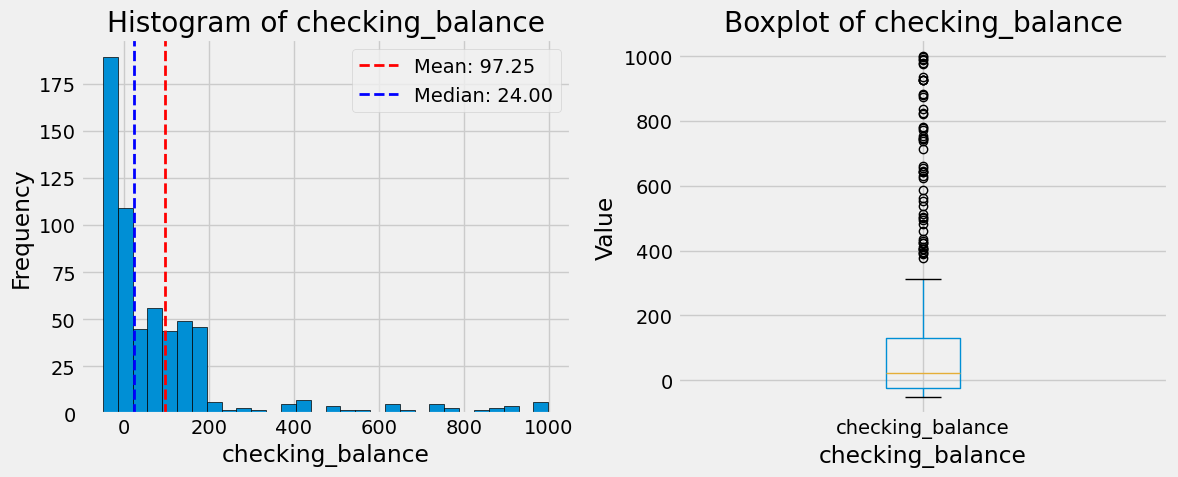

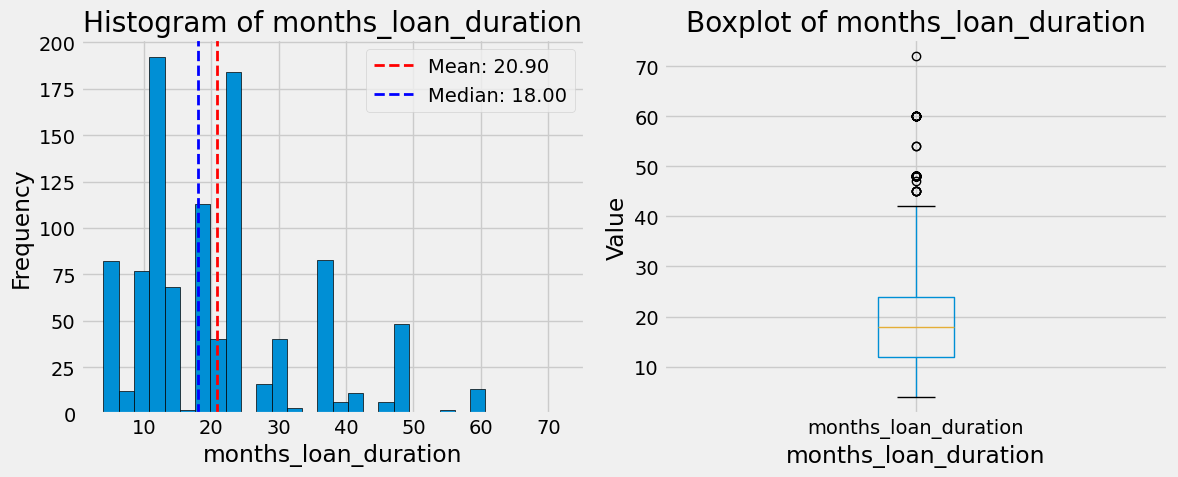

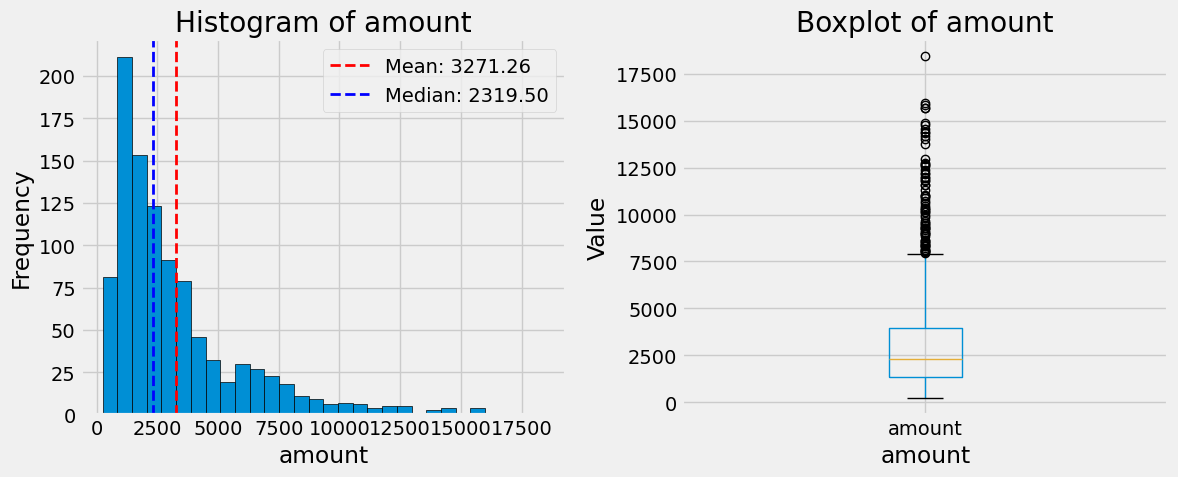

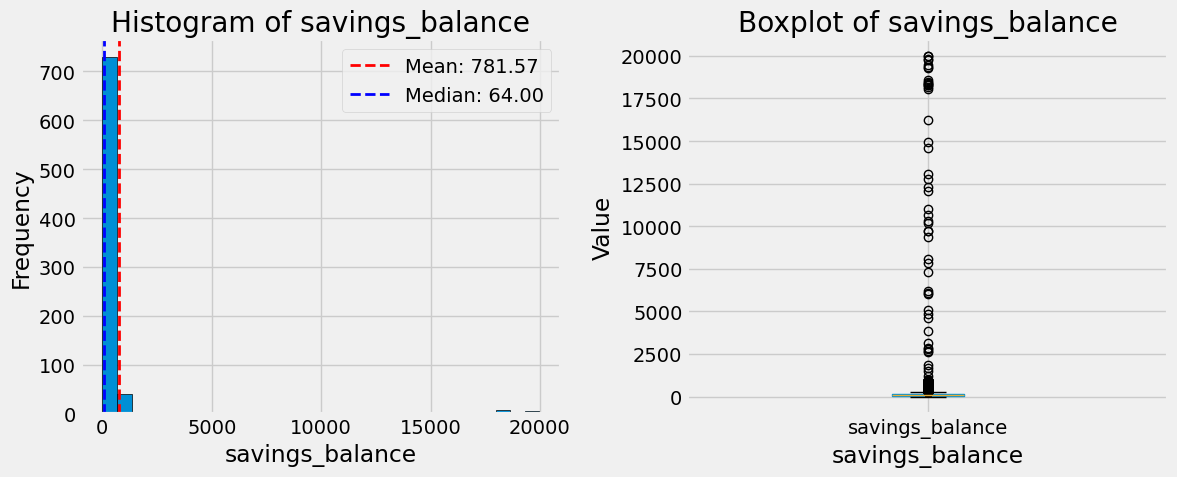

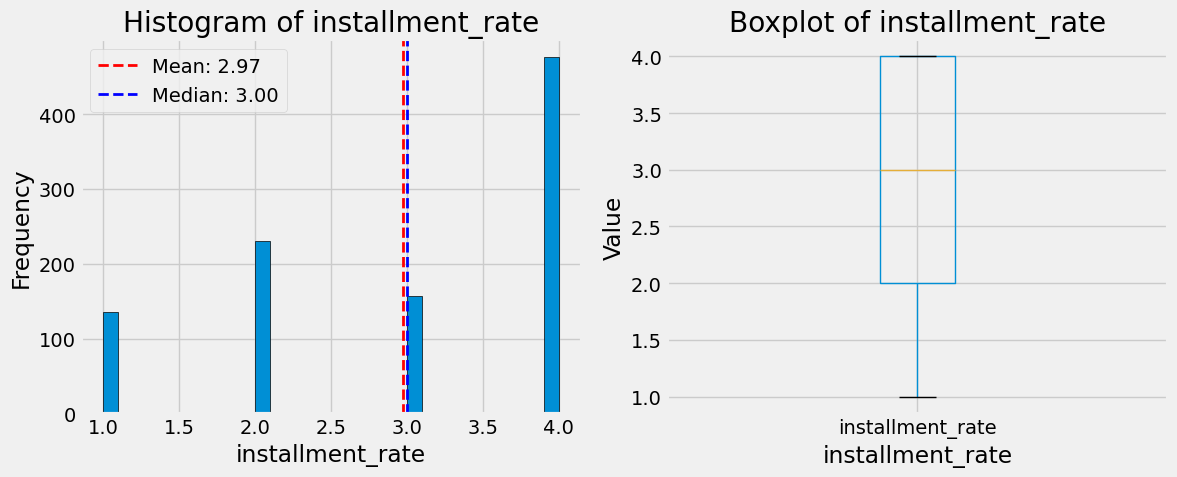

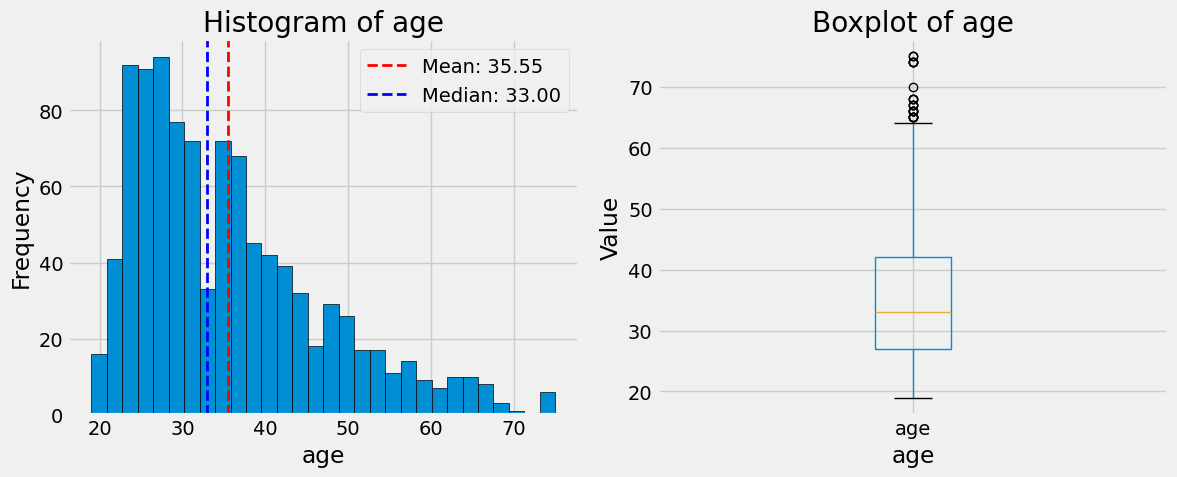

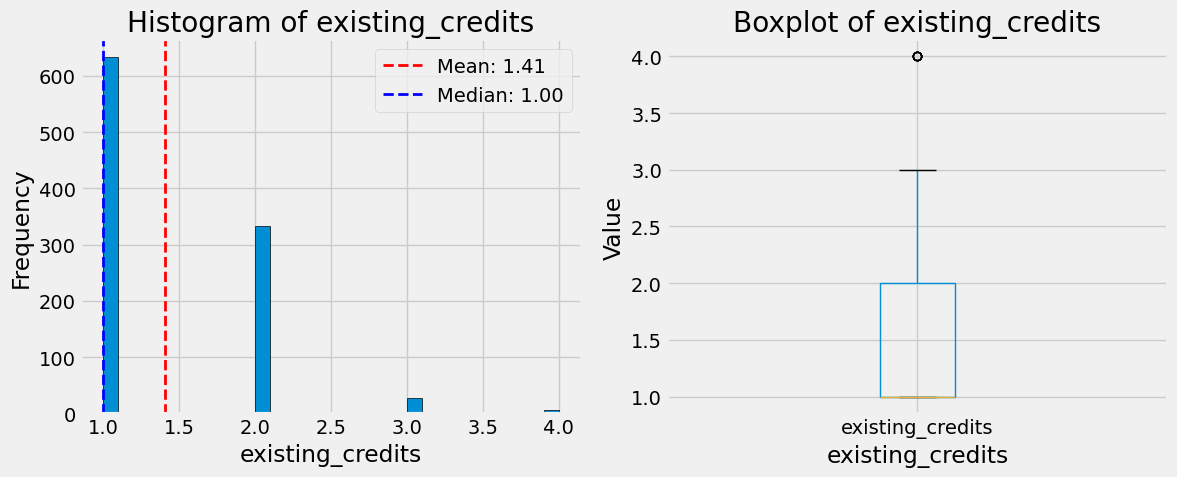

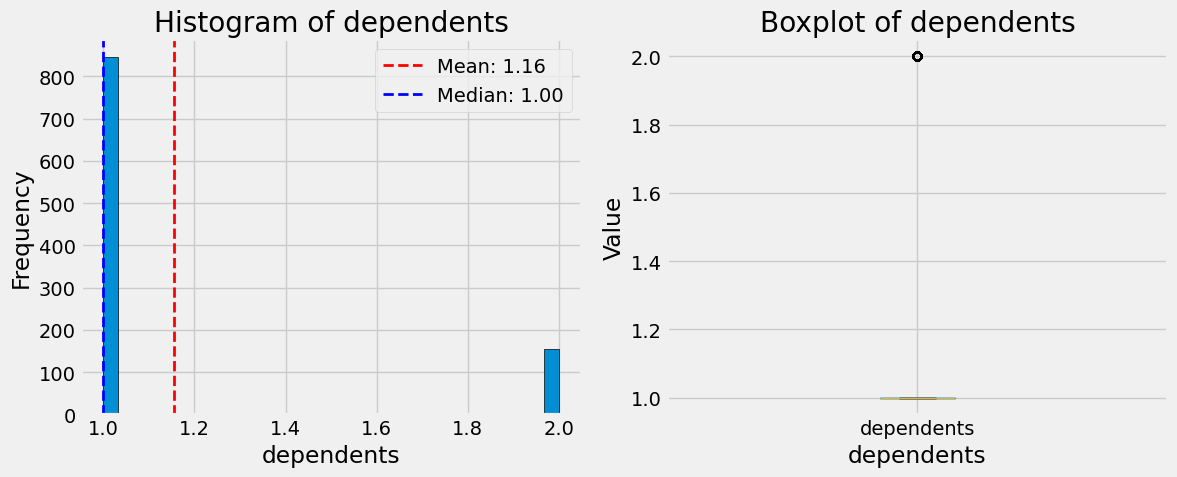

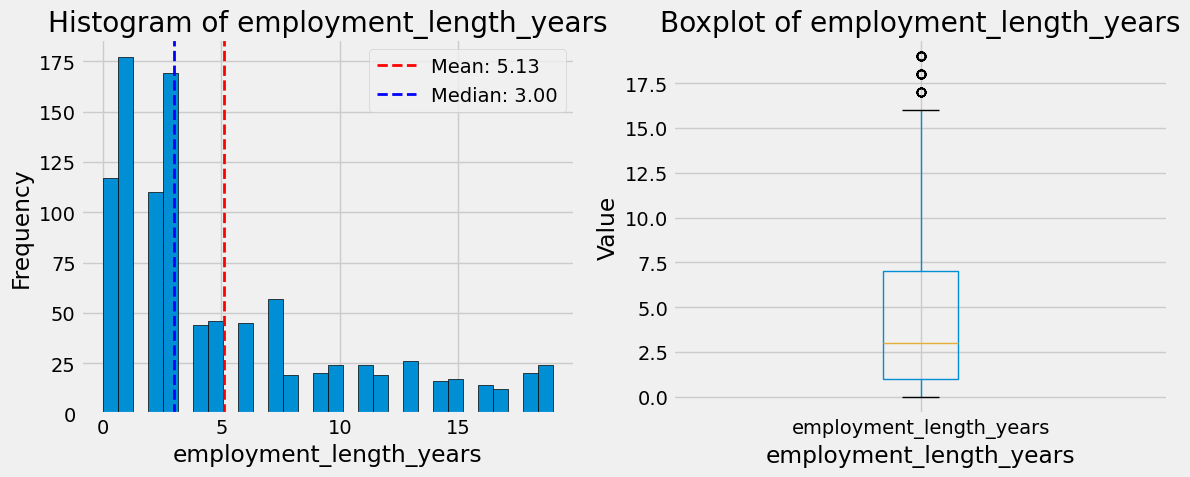

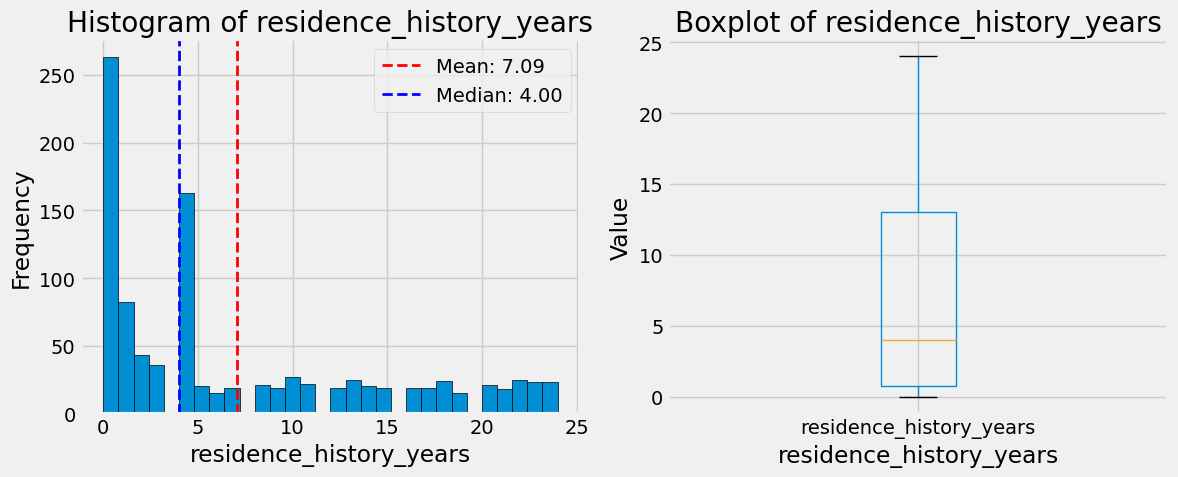

In [146]:
# Plot histogram and boxplot

plt.style.use('fivethirtyeight')
for predictor_variable in numerical_features:
    if predictor_variable != "IsDefault":
        plot_hist_box(df, predictor_variable, (12, 5))

In [147]:
for predictor_variable in df.select_dtypes("number").columns:
    if predictor_variable != "isDefault":
        print(f"{predictor_variable}: {df[predictor_variable].skew()}")

checking_balance: 2.6301676865749037
months_loan_duration: 1.0941841715555418
amount: 1.9496276798326209
savings_balance: 5.076208963501929
installment_rate: -0.5313481143125486
age: 1.0207392686768317
existing_credits: 1.2725759670020926
default: 0.874183382765495
dependents: 1.909444721297485
telephone: 0.019654121915941403
employment_length_years: 1.2431423214793613
residence_history_years: 0.9197270057074505


In [148]:
df[df["age"] > 70]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,existing_credits,default,dependents,telephone,foreign_worker,job,gender,IsDefault,employment_length_years,residence_history_years
186,42.0,9,fully repaid this bank,car (used),5129,49.0,15 years,2,NaN,none,...,1,1,2,2.349983e+09,yes,mangement self-employed,female,Bad,15.0,10.000000
330,-44.0,24,critical,car (used),6615,52.0,Unknown,2,single,none,...,2,0,1,2.346073e+09,yes,mangement self-employed,male,Good,3.0,19.000000
430,NaN,5,repaid,business,3448,3.0,7 years,1,single,none,...,1,0,1,NaN,yes,unskilled resident,male,Good,7.0,14.000000
536,-9.0,6,repaid,car (new),1374,NaN,Unknown,4,NaN,none,...,1,0,1,2.340000e+09,yes,mangement self-employed,female,Good,3.0,3.000000
606,NaN,24,critical,business,4526,60.0,2 years,3,single,none,...,1,0,1,2.341829e+09,yes,mangement self-employed,male,Good,2.0,0.416667
756,641.0,6,critical,car (new),1299,40.0,1 years,1,single,none,...,3,0,2,NaN,no,unemployed non-resident,male,Good,1.0,4.000000


Seemlike above 70 years Age accounts are geninune considering their depends and residence history

In [149]:
df[df["employment_length_years"] > df["age"]]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,existing_credits,default,dependents,telephone,foreign_worker,job,gender,IsDefault,employment_length_years,residence_history_years


In [150]:
df['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

### **Answer**

#### Positive outliers are observed in all predictor variables, resulting in right-skewed distributions. Some of these outliers are explainable:

1. months_loan_duration: Some individuals have exceptionally long credit histories.
2. age: Some Borrowers are above 70 as well. 
3. amount: One of the loan amount is aroung 18k.

Anomalies in the data include:

1. foreign worker: Very small number of cases for 'No' foreign worker, we will see if the variable is significant enough to include in the model. 
2. telephone: usually telephone and BVN numbers are mandatory to apply for a loan but here telephone is around 60% missing.  

### **How is the occurence of categorical predictor variable?**


In [151]:
def plot_count_categorical(df: pd.DataFrame, categorical_predictor_variable: str, figsize: Tuple[int, int]) -> None:
    """
    Show number of occurences of each categorical column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_column (str): The numerical column to be plotted.
        categorical_predictor_variable (str): categorical columns to be plotted
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure

    # Bar plot
    df[categorical_predictor_variable].value_counts(normalize=True).plot(kind='barh', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_predictor_variable}")
    ax.set_xlabel(categorical_predictor_variable)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.savefig(f"/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/countplot_of_{categorical_predictor_variable}.png", bbox_inches = 'tight')
    plt.show()

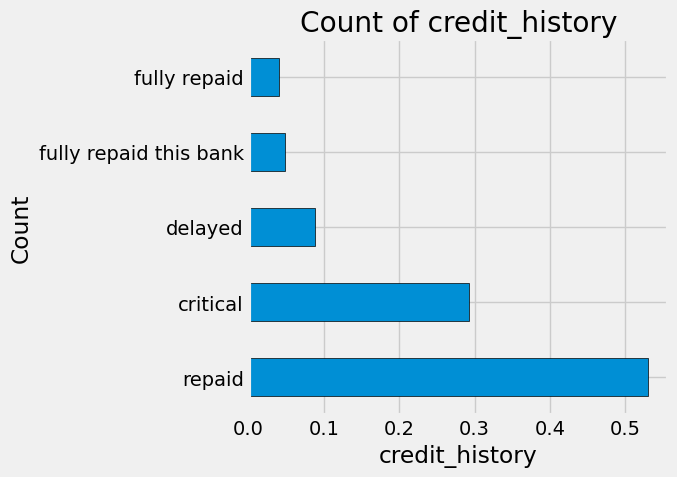

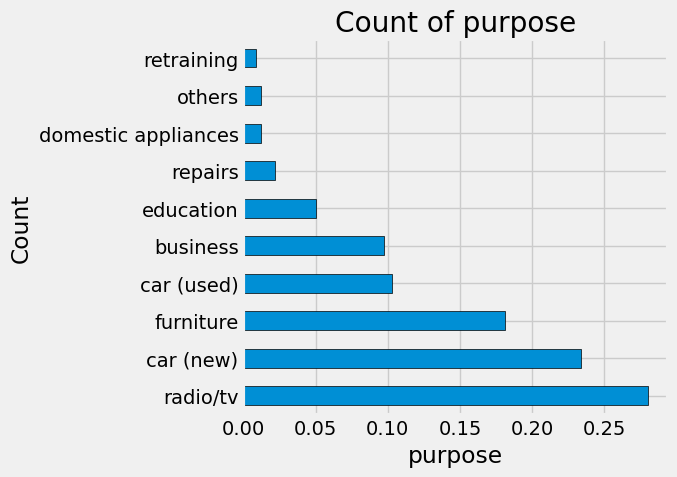

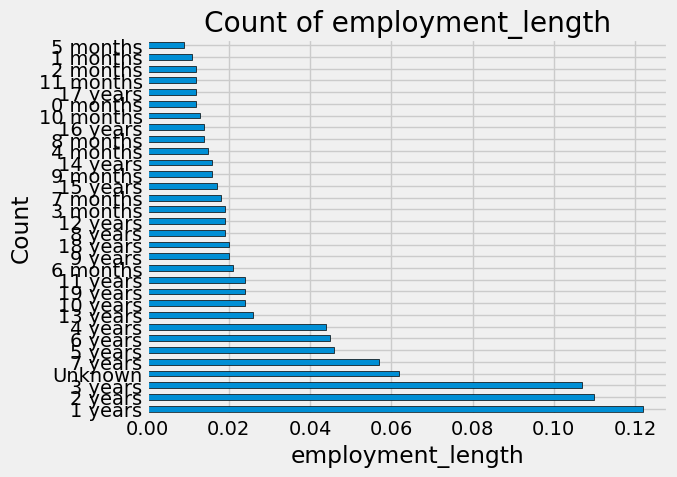

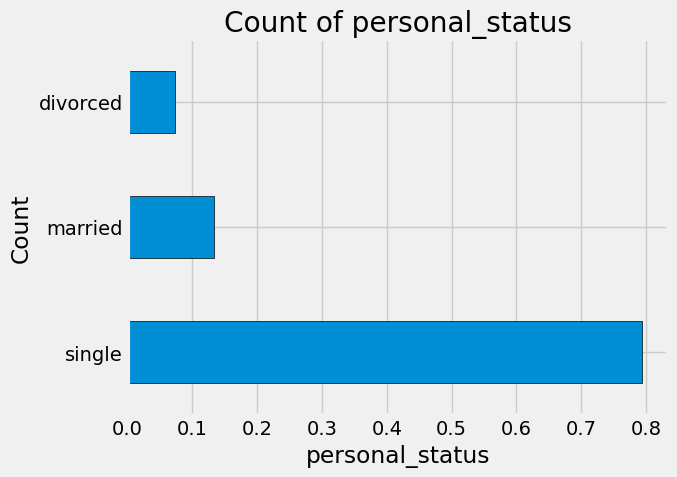

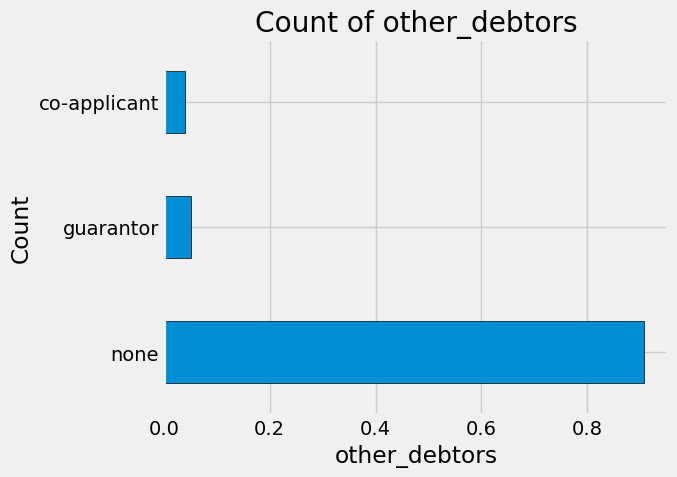

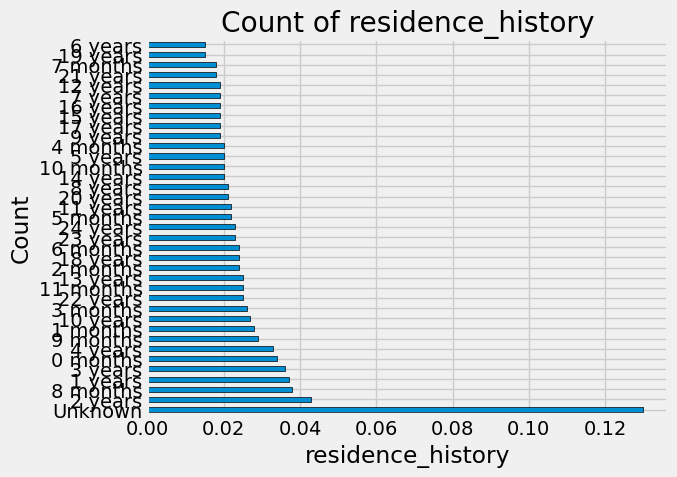

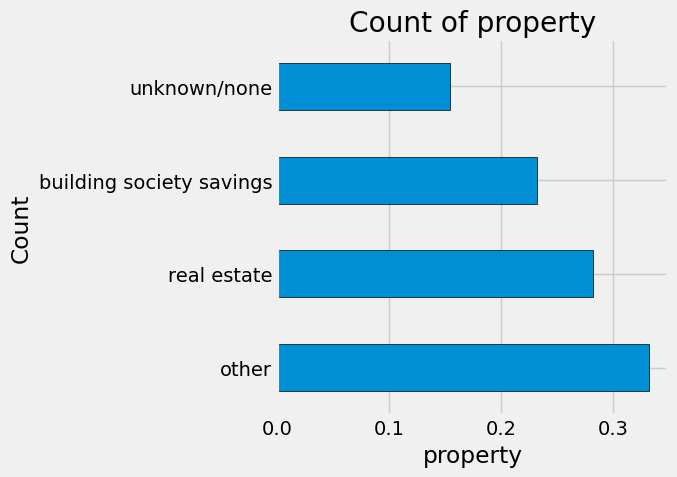

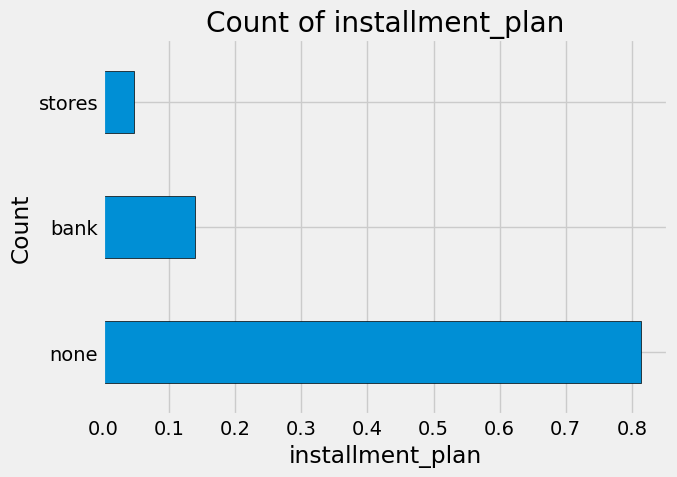

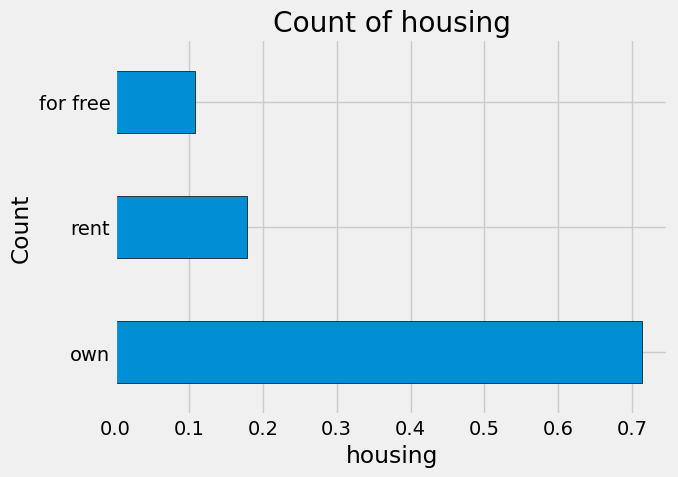

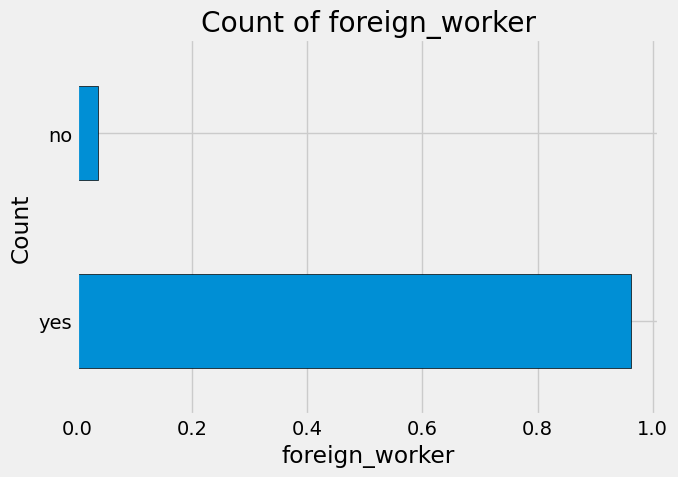

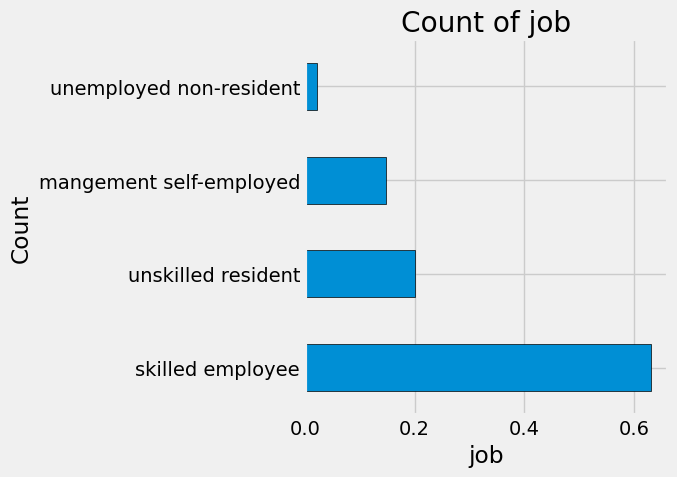

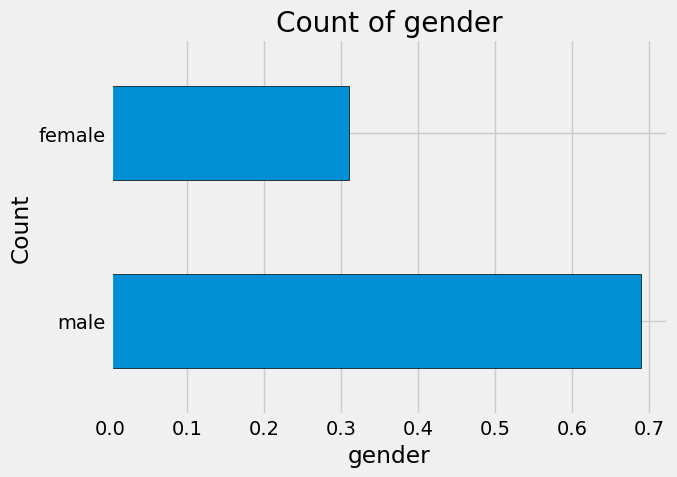

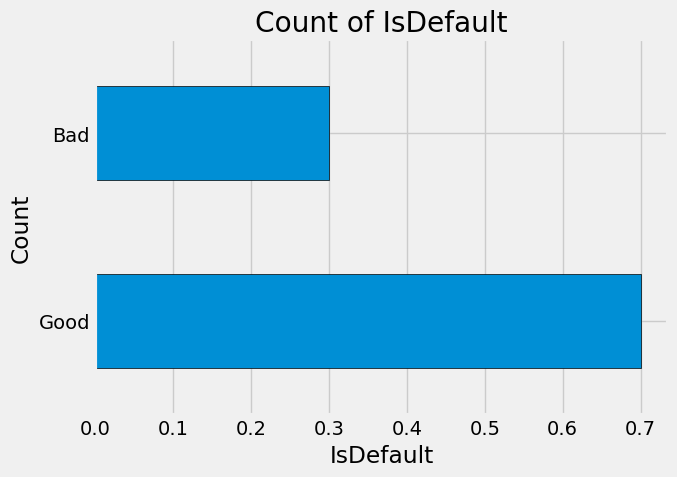

In [152]:
plt.style.use('fivethirtyeight')
for predictor_variable in categorical_features:
    plot_count_categorical(df, predictor_variable, (7, 5))

### **Answer**

The occurences of:

1. Most of the customers are single have an employment length of 1 -5 years and live in their own house. 
2. Other debtors distribution is highly skewed towards None.
3. Foreign worker is highly skewed towards 'Yes' 
4. Almost 50% of the customer have repaid the amount. 


## <span style="color:darkgreen;">**Bivariate Analysis**</span>


#### **What is the distribution of the numerical predictor variable across different classes of the response target variable?**


In [153]:
def plot_dist_numerical_by_target(df: pd.DataFrame, numerical_predictor_variable: str, response_variable: str, figsize: Tuple[int, int]) -> None:
    """
    Show distribution and boxplot of a numerical column, grouped by a target column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_predictor_variable (str): The numerical column to be plotted.
        response_variable (str): The target column for grouping.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, axes = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns

    # KDE plot with hue
    for target_value in df[response_variable].unique():
        sns.kdeplot(data=df[df[response_variable]==target_value], x=numerical_predictor_variable, ax=axes[0], label=target_value)
    axes[0].set_title(f"Distribution of {numerical_predictor_variable}")
    axes[0].set_xlabel(numerical_predictor_variable)
    axes[0].set_ylabel("Density")
    axes[0].legend(title=response_variable)

    # Boxplot with hue
    sns.boxplot(x=response_variable, y=numerical_predictor_variable, data=df, hue=response_variable, ax=axes[1])
    axes[1].set_title(f"Boxplot of {numerical_predictor_variable}")
    axes[1].set_xlabel(response_variable)
    axes[1].set_ylabel(numerical_predictor_variable)

    # Show plots
    plt.tight_layout()
    plt.savefig(f"/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/histogram_{numerical_predictor_variable}_vs_{response_variable}.png", bbox_inches = 'tight')
    plt.show()

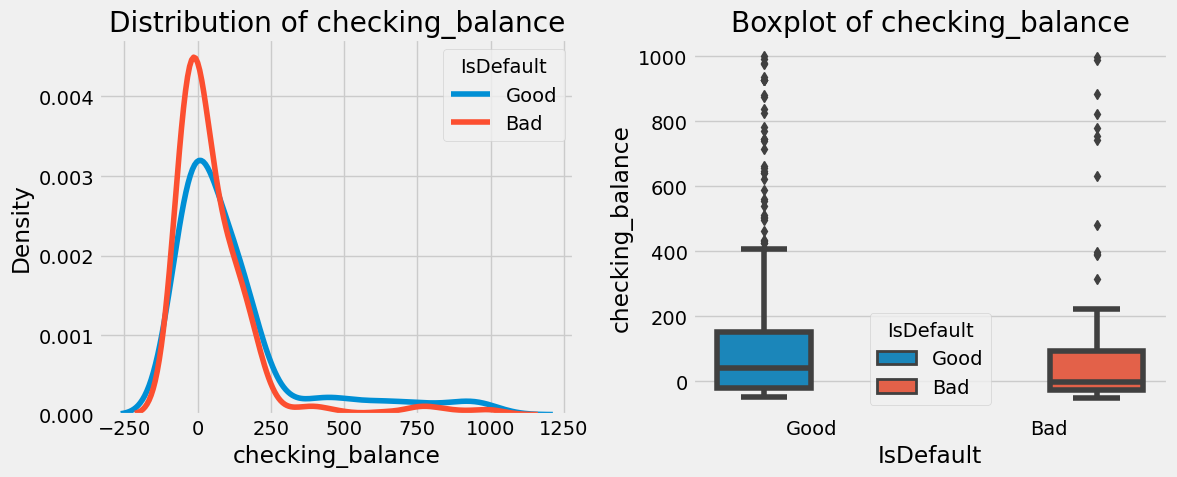

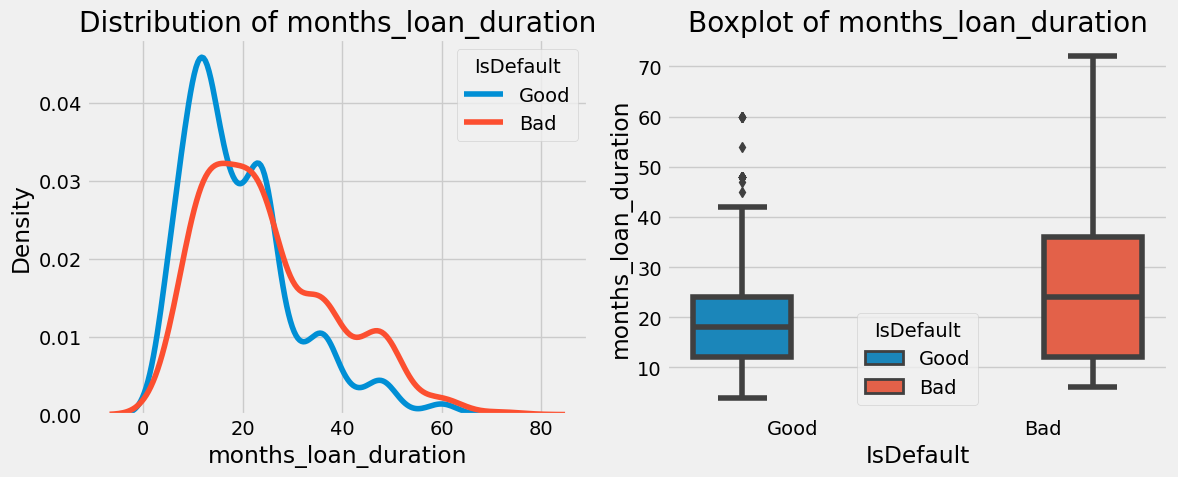

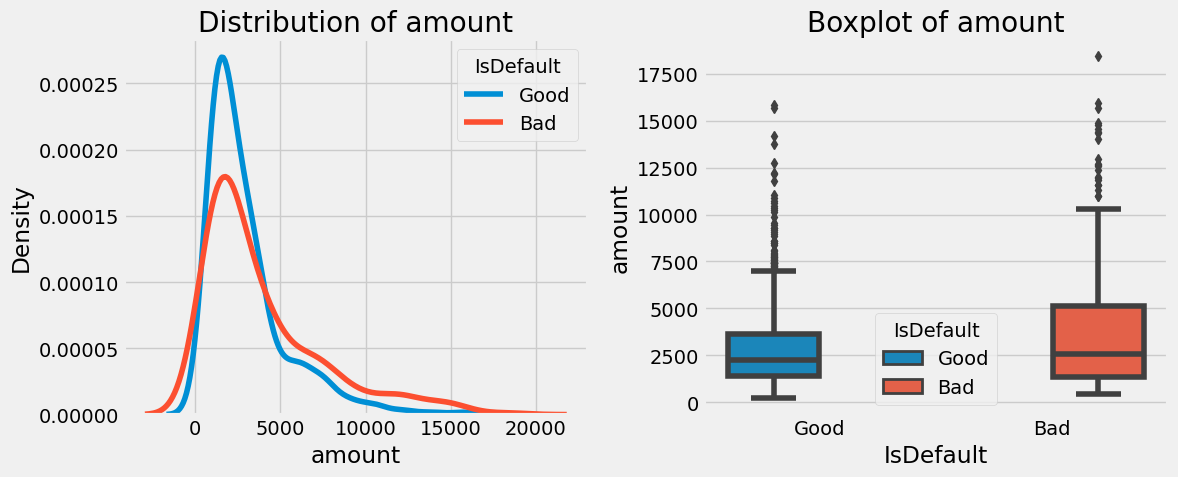

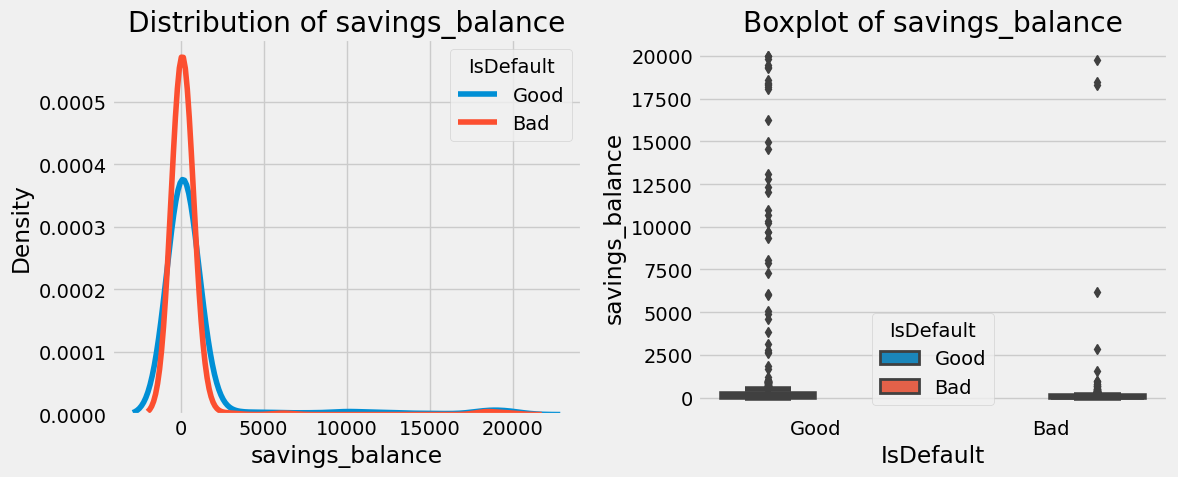

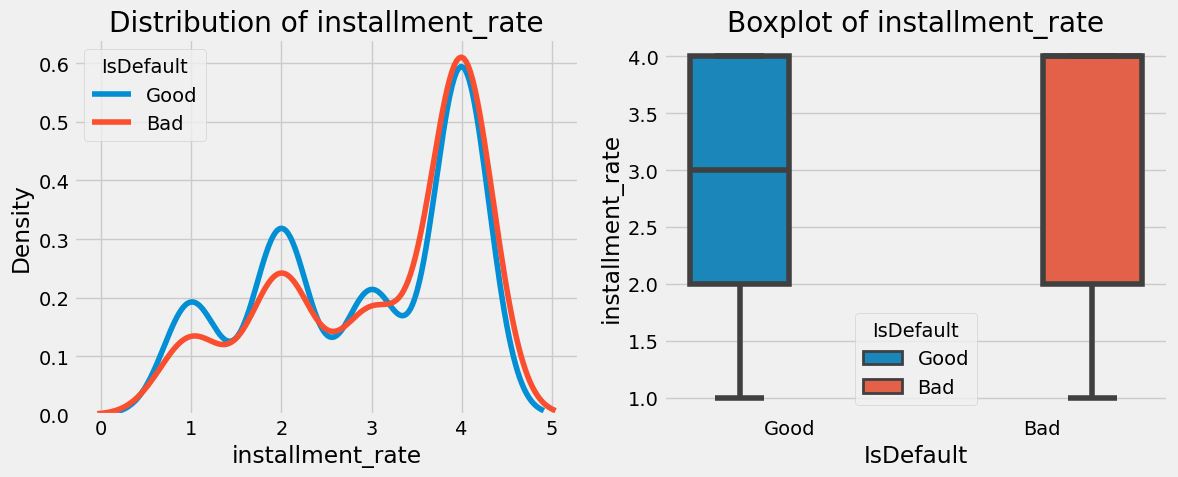

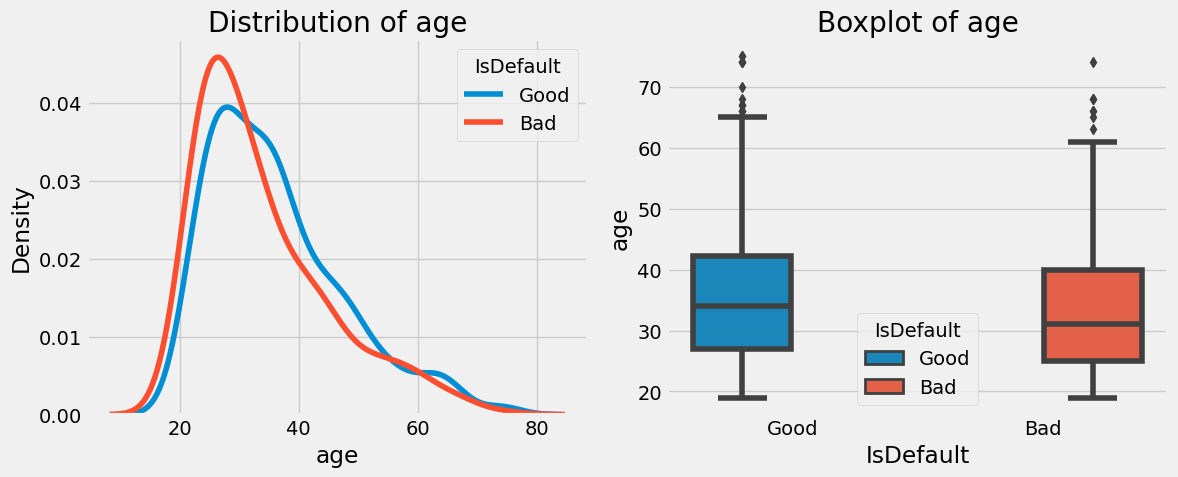

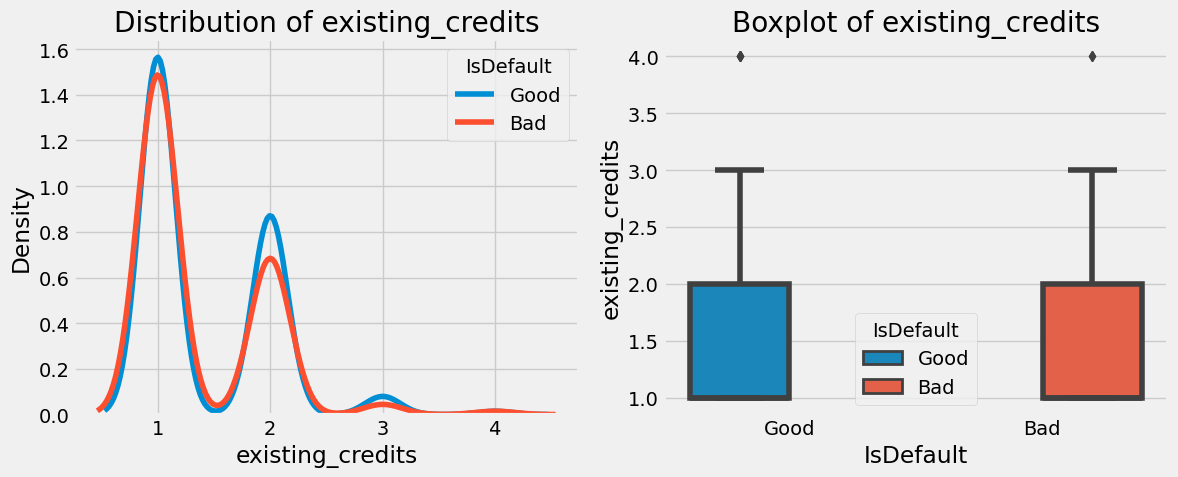

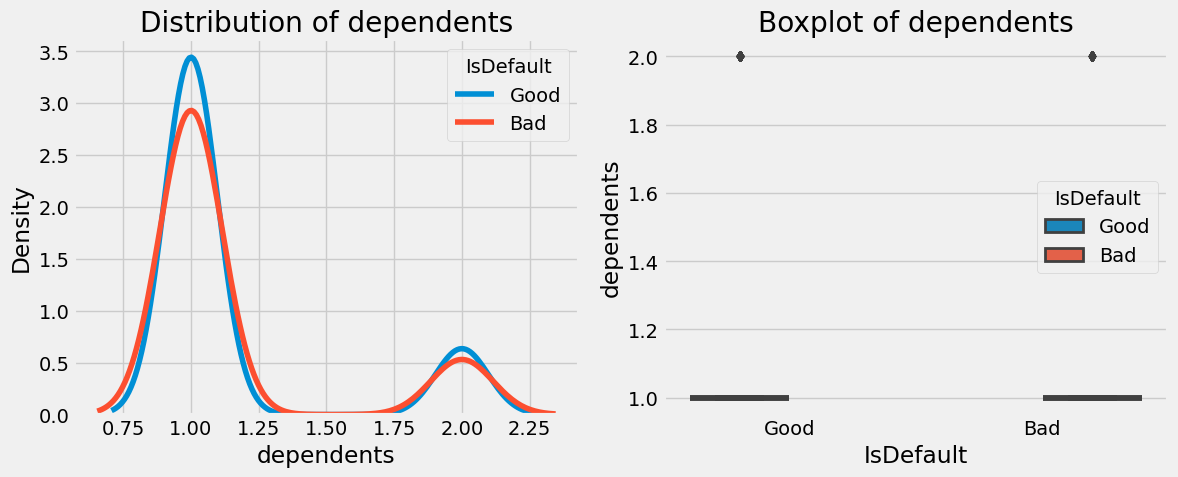

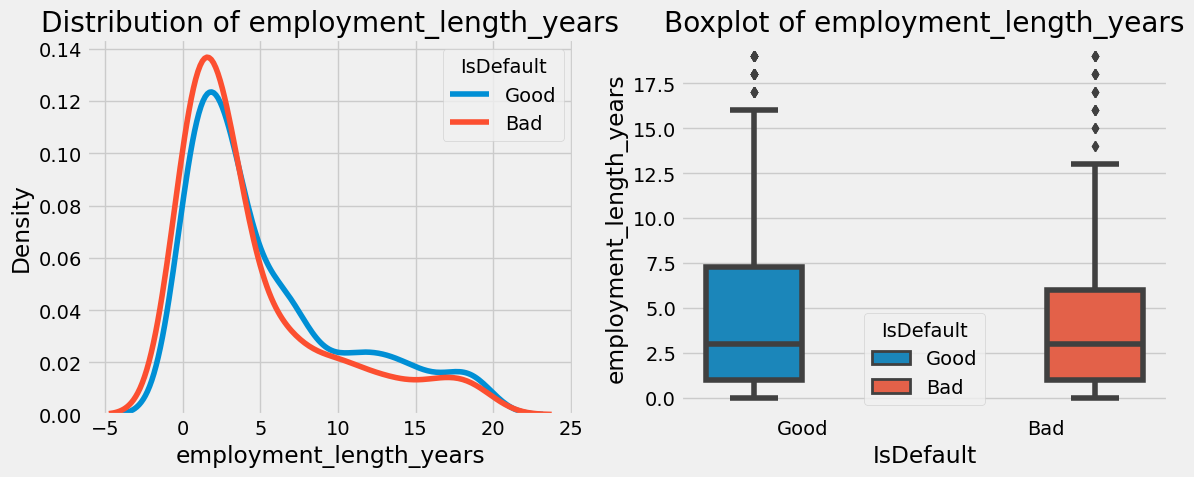

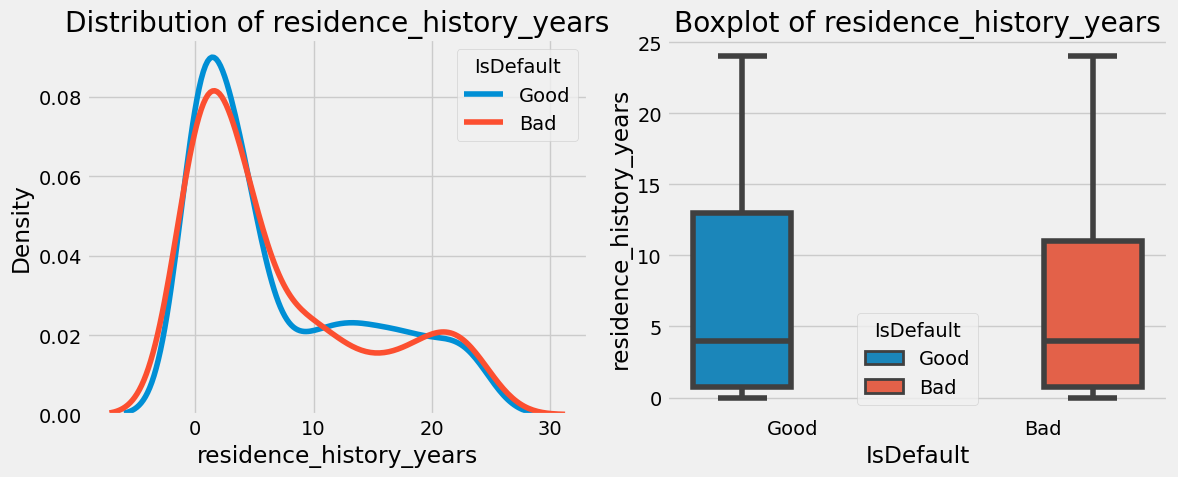

In [154]:
for predictor_variable in numerical_features:
    if predictor_variable != "IsDefault":
        plot_dist_numerical_by_target(df, predictor_variable, "IsDefault", (12, 5))

#### **Answer**

Distributions of savings_balance and checking_balance vary based on the response variable, suggesting that higher values of these features correlate with a higher likelihood of default.

### **Do certain categories of the categorical predictor variable have higher or lower probabilities of a specific class in the response variable?**

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
from matplotlib import cm


def plot_probability_response_by_categorical(df: pd.DataFrame, categorical_predictor_variable: str, response_variable: str, figsize: Tuple[int, int]) -> None:
    '''
    Show count of values inside categorical column, grouped by a response column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        categorical_predictor_variable (str): The categorical column to be plotted.
        response_variable (str): The response column for grouping.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    '''
    fig, ax = plt.subplots(figsize=figsize)  # Create a figure

    # Calculate normalized value counts
    proportions = df.groupby(categorical_predictor_variable)[response_variable].value_counts(normalize=True).unstack()

    # Sorting by class '1' if it exists
    if 1 in proportions.columns:
        proportions = proportions.sort_values(by=1)
    else:
        proportions = proportions.sort_values(by=proportions.columns[-1])  # Sort by the last column if '1' doesn't exist

    cmap = cm.get_cmap('tab20')

    # Plotting the proportions
    proportions.plot(kind='barh', stacked=True, ax=ax, cmap=cmap)
    ax.set_xlabel(categorical_predictor_variable)
    ax.set_ylabel('Proportion')
    ax.set_title(f'Probability of Default Given {categorical_predictor_variable}')
    ax.legend(title=response_variable)

    # Add annotations for class 1, if it exists
    if 1 in proportions.columns:
        for i in range(len(proportions)):
            proportion_value = proportions.iloc[i][1]
            ax.annotate(f'{proportion_value:.2f}', 
                        xy=(1-proportion_value, i), 
                        xytext=(3, 0), 
                        textcoords='offset points', 
                        va='center', 
                        ha='left', 
                        color='white' if proportion_value < 0.5 else 'black', 
                        fontsize=10, 
                        fontweight='bold')
    # Show plot
    plt.tight_layout()
    plt.savefig(f"/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/probability_default_by_given_{categorical_predictor_variable}.png", bbox_inches='tight')
    plt.show()

In [156]:
categorical_features =['credit_history',
 'purpose',
 'personal_status',
 'other_debtors',
 'property',
 'installment_plan',
 'housing',
 'foreign_worker',
 'job',
 'gender']

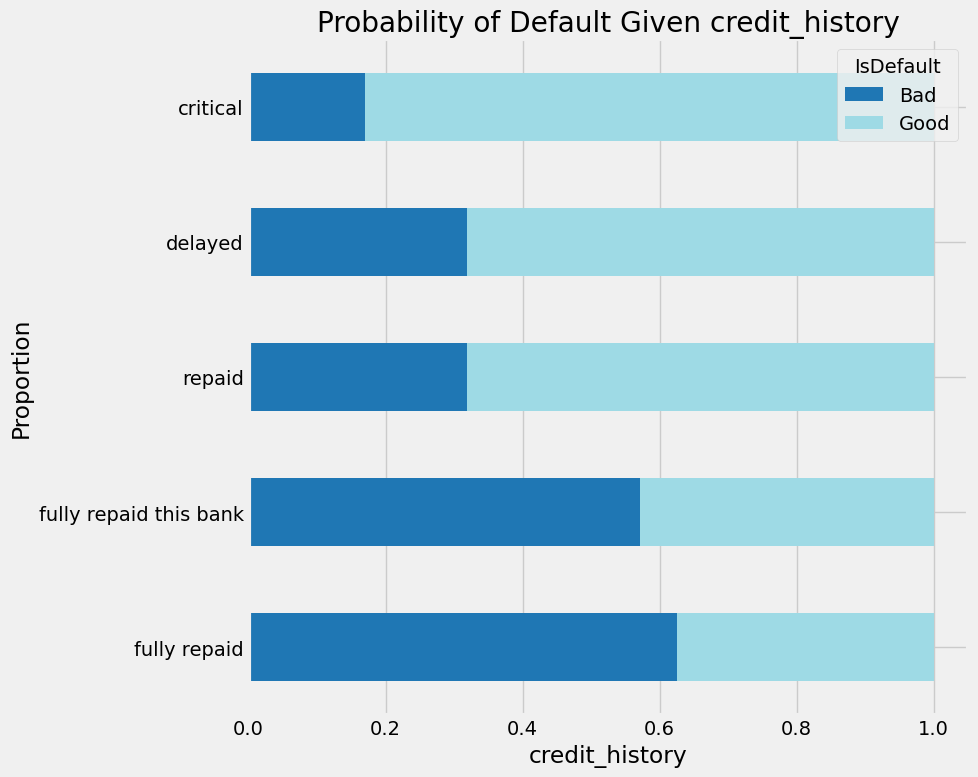

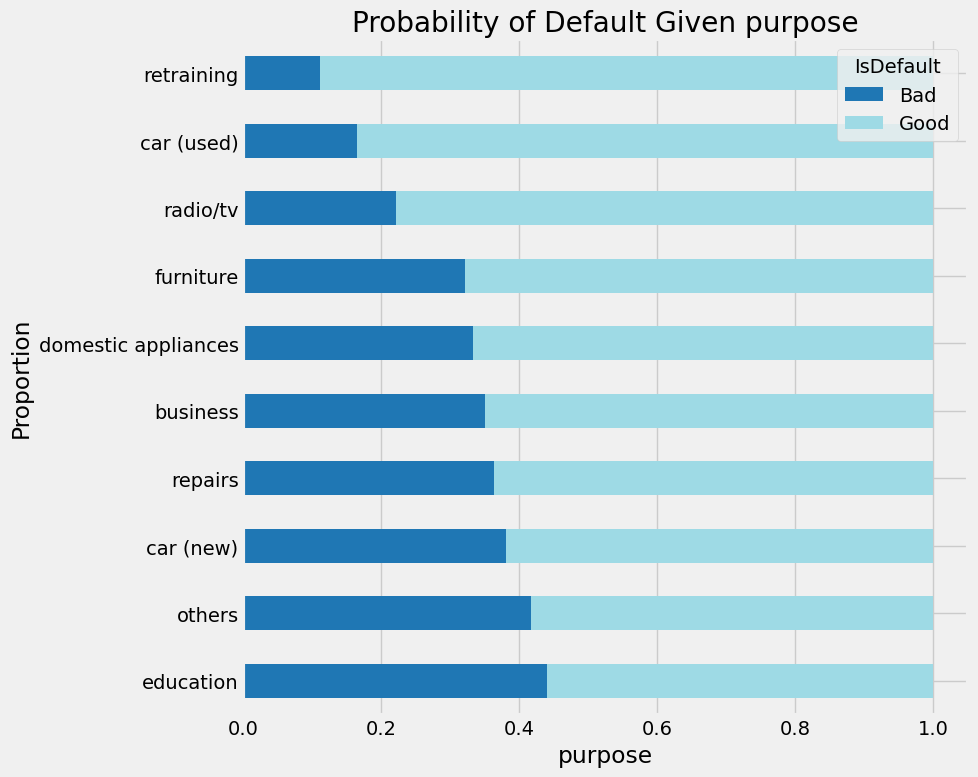

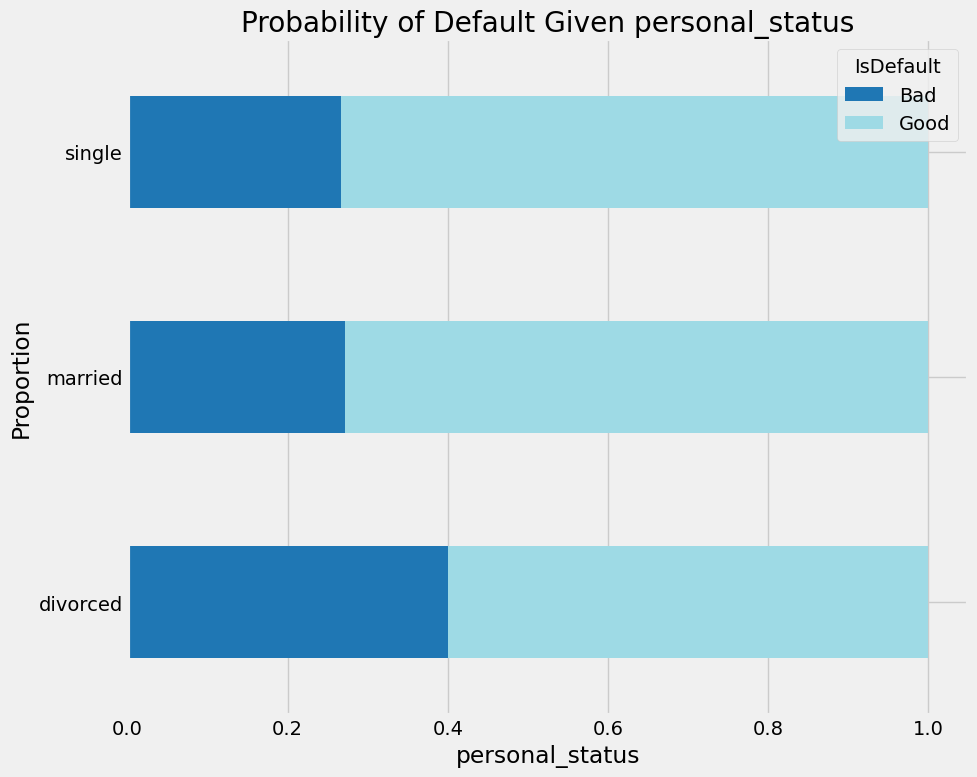

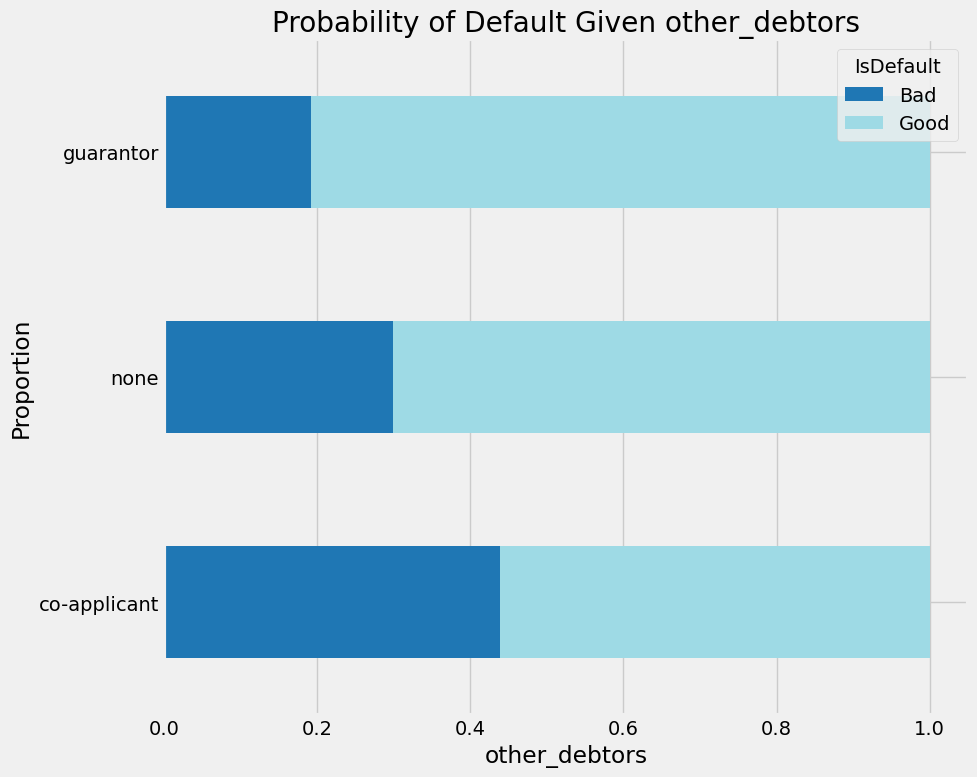

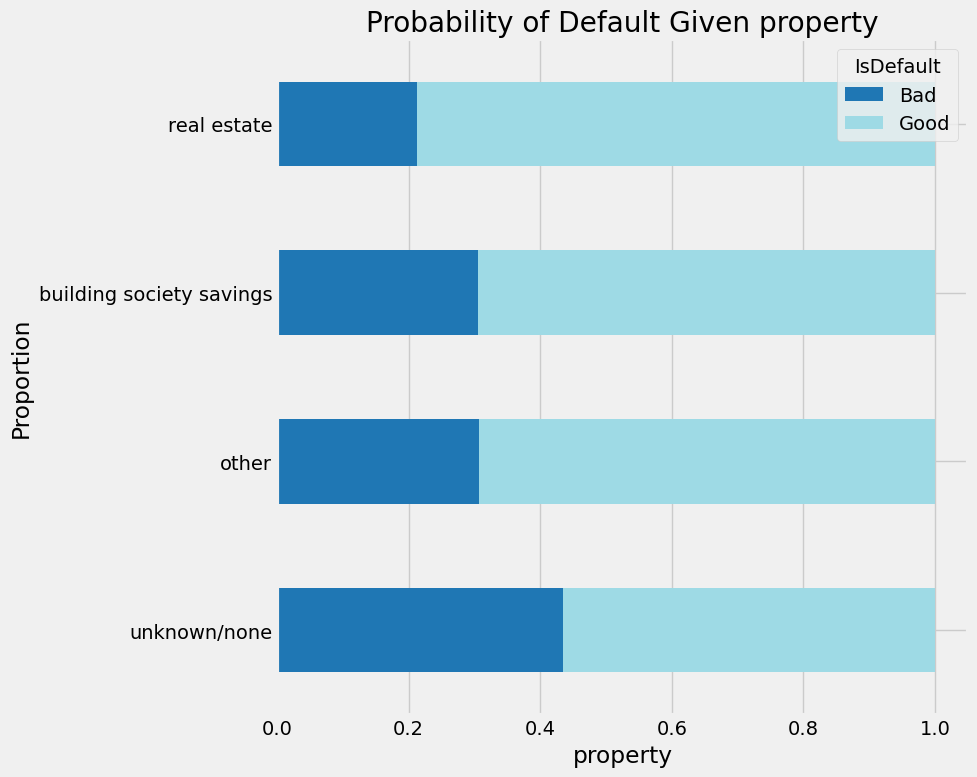

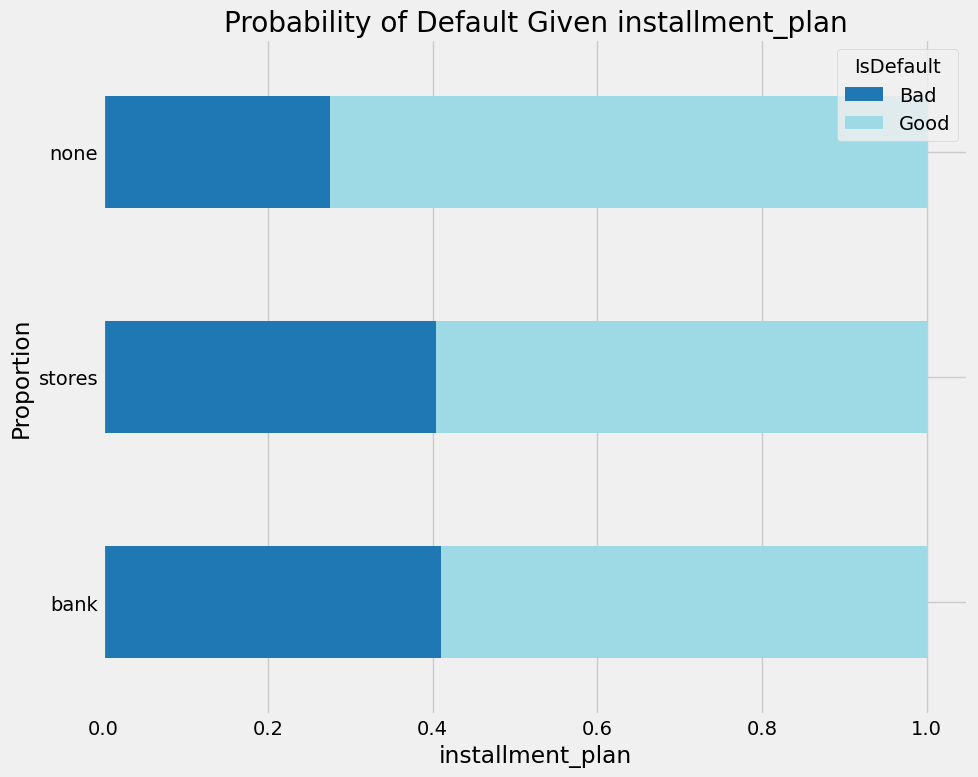

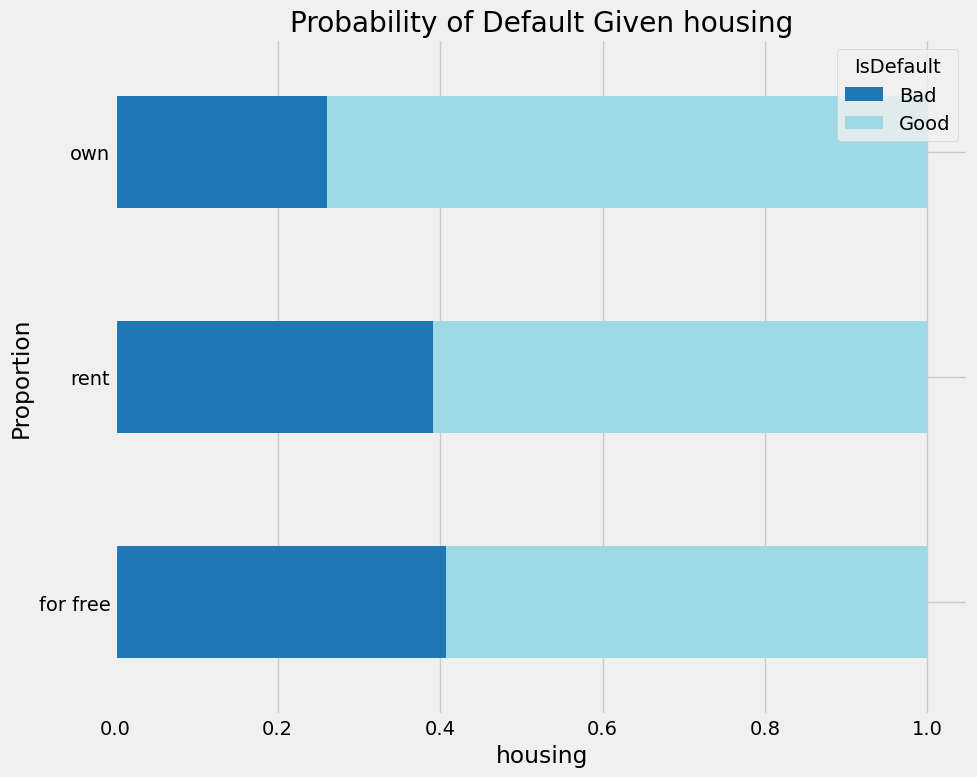

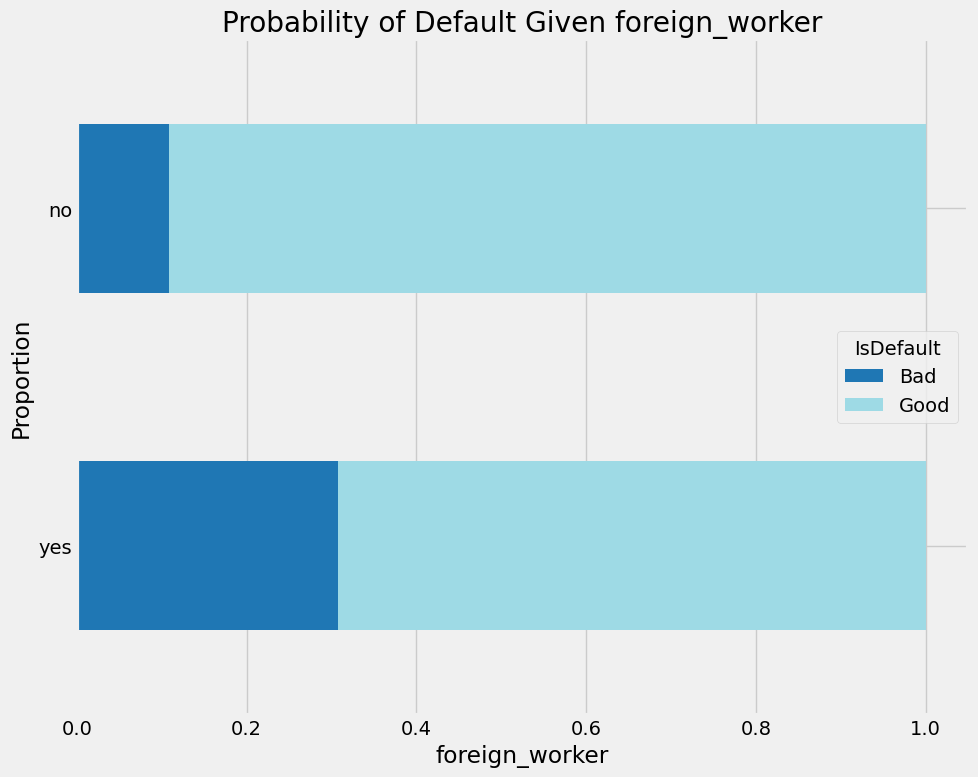

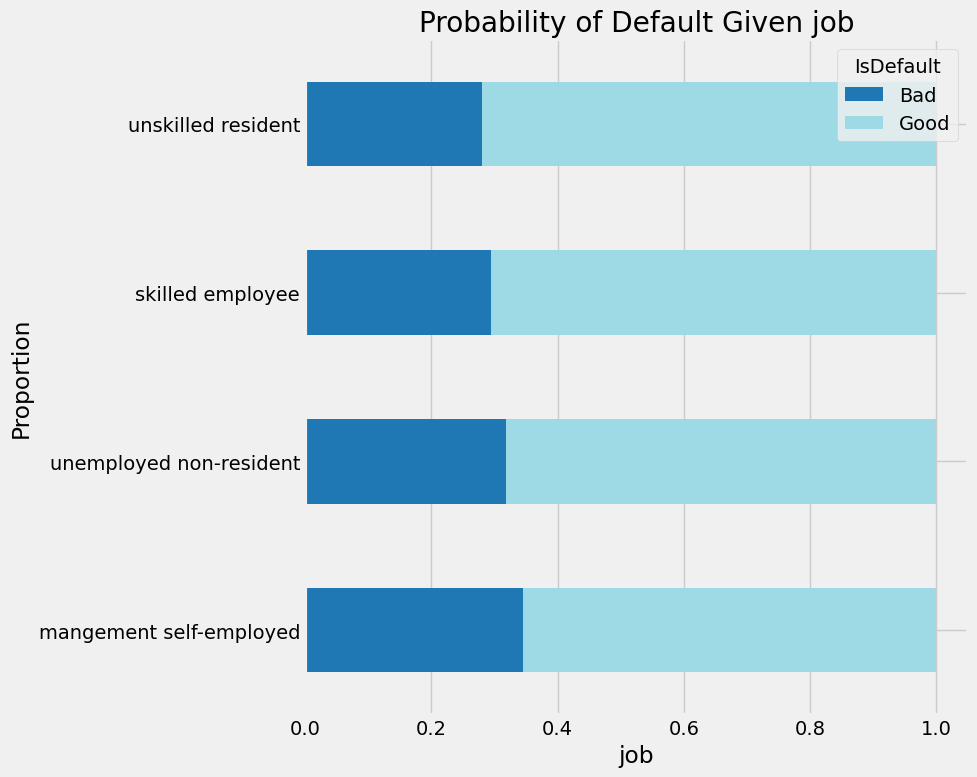

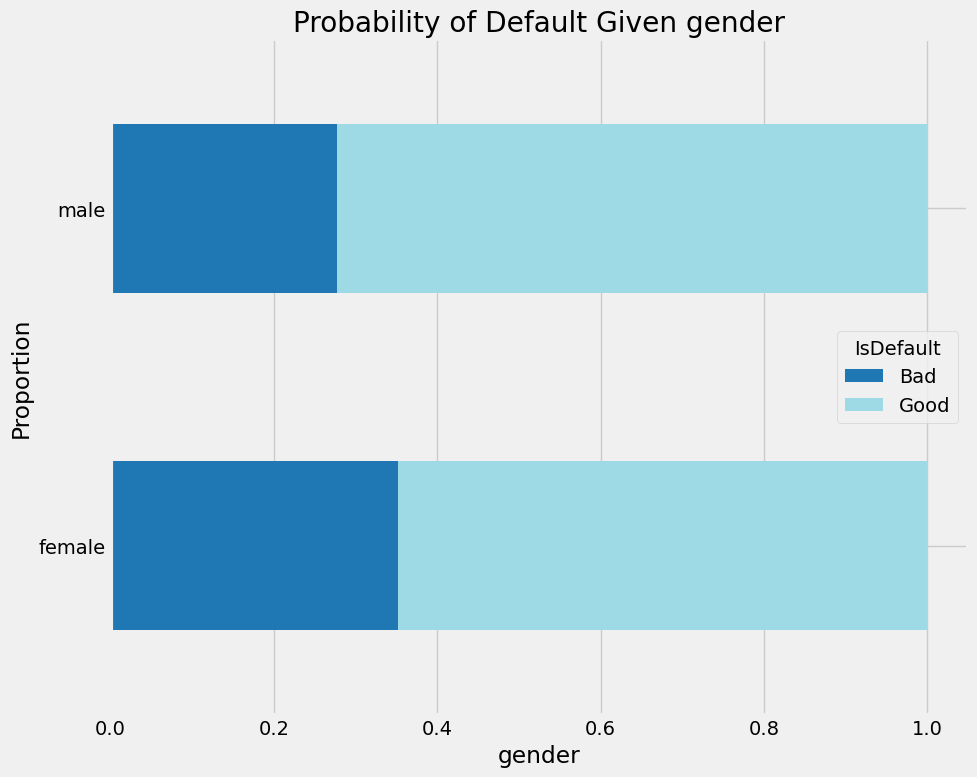

In [157]:
response_variable = 'IsDefault'
for predictor_variable in categorical_features:
    plot_probability_response_by_categorical(df, predictor_variable, response_variable, (10, 8))

#### **Answer**

1. person_home_ownership: The probability of default is highest among those who still rent (40%) and those with other types of home ownership i.e. free (35%).

2. loan_intent: The probability of loan default is highest among those who took out loans for education purposes (43%), followed by car (38%), home improvement (26%),business (20%), applicances (17%).

3. loan_grade: The probability of loan default is higher for self empployed individuals espcially working in foregin countries. 

## <span style="color:darkgreen;">**MultiVariate Analysis**</span>


### **How is the correlation amongst numerical predictor variable?**

Check if there's an correlation between amongst numerical predictor variables.




In [158]:
def plot_heatmap(df: pd.DataFrame, figsize: Tuple[int, int]) -> None:
    """
    Show the visualization of coefficient correlation amongst features.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure

    # Calculate the coefficient correlation
    corr = df.select_dtypes(include='number').corr()

    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.savefig(f"/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/correlation_matrix_heatmap.png", bbox_inches = 'tight')
    plt.show()

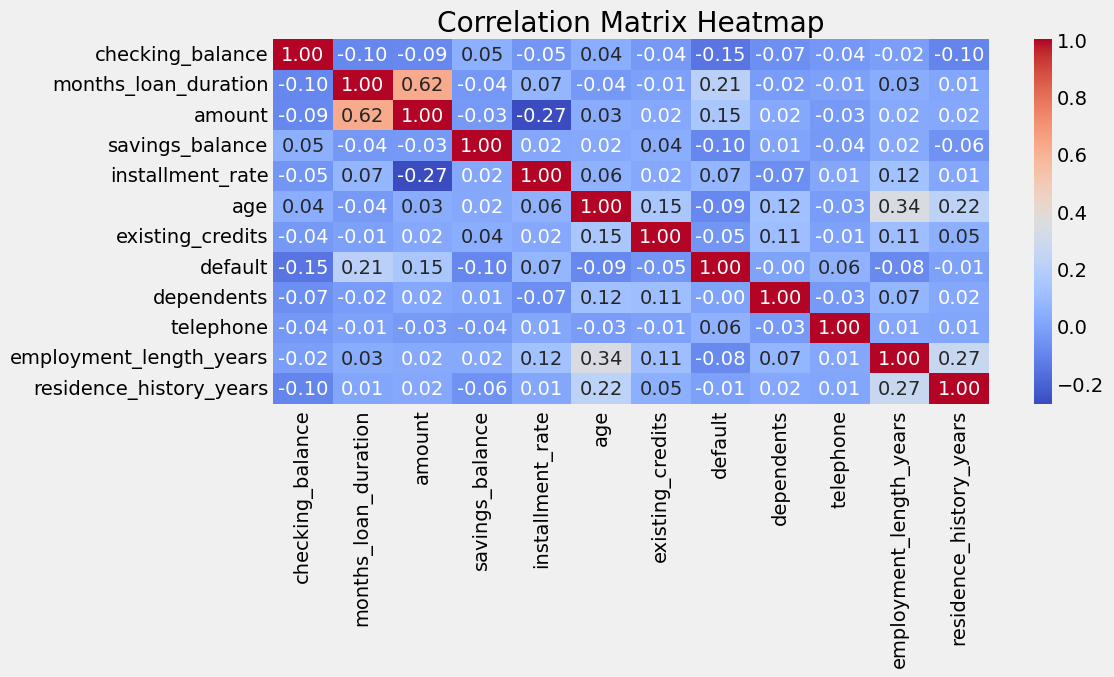

In [159]:
plot_heatmap(df, (12, 7))


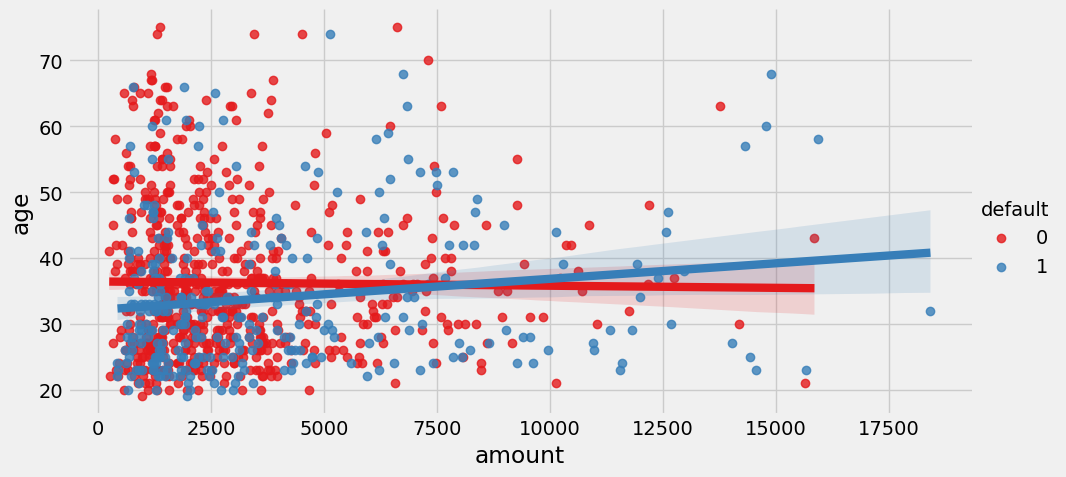

In [204]:
sns.lmplot(x="amount",y="age", hue="default", data=df, palette="Set1", aspect=2)
plt.show()

The plot above indicates that there is no significant difference between men and women.



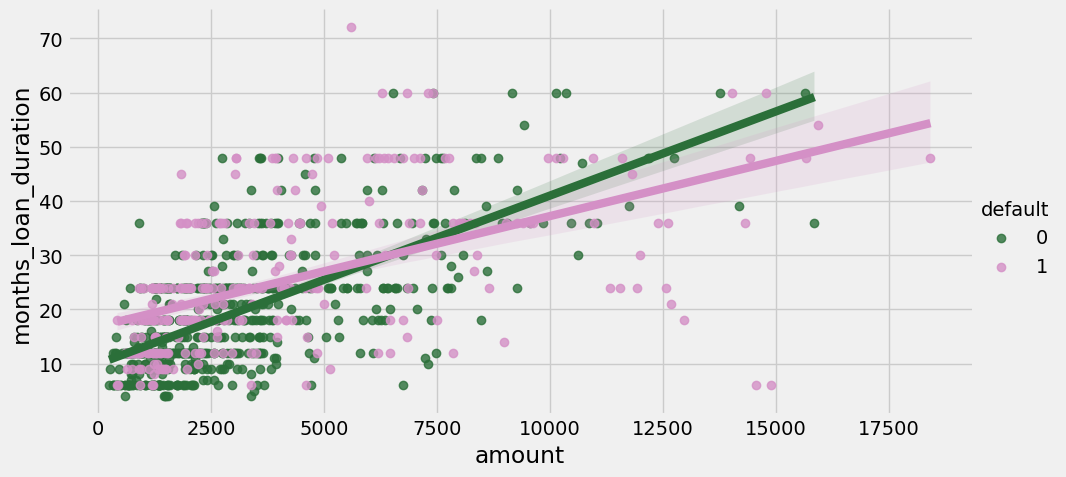

In [208]:
sns.lmplot(x="amount",y="months_loan_duration", hue="default", data=df, palette="cubehelix", aspect=2)
plt.show()

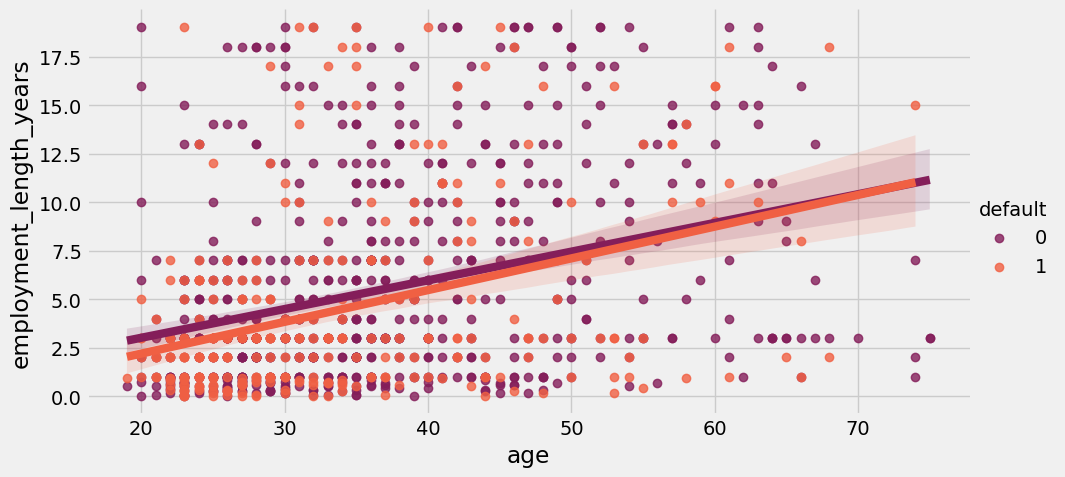

In [209]:
sns.lmplot(x="age",y="employment_length_years", hue="default", data=df, palette="rocket", aspect=2)
plt.show()

### **Answer**

There are multicollinearity amongst numerical predictor variable, such as: Age vs employment_length and amount vs loan_duration.




## **Final Remarks:**

**Null Analysis:**

- We are going to drop Telephone, Foreign Worker Features.
- Fill the NaNs with 'Unknown' for employment_length and residential_history and Personal Status
- Consider using a combination of mean/median imputation and flagging the missing values, as dropping the feature might result in losing important information.
- For savings_balance KNN or mean imputation could work well, considering its lower percentage of missing values.

**Segments to Lookout for:**

- employment_length and residence_history could be strong predictor.
- we will try to create some new features such as interaction features, temporal features, time-based, and ratios between multiple features.
- improvement in feature could help build a good model.

### **Null Correction and final dataset prepartion for Model Development**

In [167]:
from sklearn.impute import KNNImputer

df['personal_status'].fillna("Unknown", inplace=True)

# 1. For checking_balance (mean/median imputation)
mean_checking_balance = df['checking_balance'].mean()  # or df['checking_balance'].median()
df['checking_balance'].fillna(mean_checking_balance, inplace=True)

# 2. For savings_balance (KNN imputation)
# Create a KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Reshape the savings_balance column to fit the imputer
savings_balance_reshaped = df[['savings_balance']].values

# Perform KNN imputation
df[['savings_balance']] = knn_imputer.fit_transform(savings_balance_reshaped)


In [168]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job', 'gender',
       'IsDefault', 'employment_length_years', 'residence_history_years'],
      dtype='object')

In [169]:
df = df.drop(columns=['telephone', 'employment_length', 'residence_history', 'IsDefault'], axis=1)
df


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,other_debtors,property,...,installment_plan,housing,existing_credits,default,dependents,foreign_worker,job,gender,employment_length_years,residence_history_years
0,-43.000000,6,critical,radio/tv,1169,781.570379,4,single,none,real estate,...,none,own,2,0,1,yes,skilled employee,male,13.0,6.000000
1,75.000000,48,repaid,radio/tv,5951,89.000000,2,Unknown,none,real estate,...,none,own,1,1,1,yes,skilled employee,female,2.0,0.416667
2,97.245875,12,critical,education,2096,24.000000,2,single,none,real estate,...,none,own,1,0,2,yes,unskilled resident,male,5.0,4.000000
3,-32.000000,42,repaid,furniture,7882,9.000000,2,single,guarantor,building society savings,...,none,for free,1,0,2,yes,skilled employee,male,5.0,13.000000
4,-23.000000,24,delayed,car (new),4870,43.000000,3,single,none,unknown/none,...,none,for free,2,1,2,yes,skilled employee,male,3.0,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,97.245875,12,repaid,furniture,1736,48.000000,3,Unknown,none,real estate,...,none,own,1,0,1,yes,unskilled resident,female,4.0,20.000000
996,-30.000000,30,repaid,car (used),3857,20.000000,4,divorced,none,building society savings,...,none,own,1,0,1,yes,mangement self-employed,male,3.0,5.000000
997,97.245875,12,repaid,radio/tv,804,44.000000,4,single,none,other,...,none,own,1,0,1,yes,skilled employee,male,13.0,16.000000
998,-18.000000,45,repaid,radio/tv,1845,31.000000,4,single,none,unknown/none,...,none,for free,1,1,1,yes,skilled employee,male,2.0,8.000000


In [170]:
df.to_excel('/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/data/Processed/processed_credit_data.xlsx')